In [0]:
# Setup the file system
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/BME230B/Final_Project') # Moh path
# os.chdir('/content/drive/My Drive/BME-230B/') # Trevor Path
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/BME230B/Final_Project'

#Identifying SARS-CoV2 Drug Targets with a Systems Biology approach

##Mohammad Abdulqader, Trevor Ridgley
___

##Introduction
A novel coronavirus known as SARS-CoV2 emerged in 2019 and led to the Covid-19 pandemic affecting millions of people worldwide. Patients who become symptomatic or progress to severe disease tend to experience lung complications like pneumonia and fibrosis. There is not yet an effective treatment for Covid-19, but vaccine development is underway for the coronavirus.

##Background:

* TenOever paper notes that SARS-CoV2 gene expression signature is consistent with prior SARS and IAV that have known host antagonist interaction [1].

* Specifically, SARS-CoV2 and IAV show similar inhibition of interferon pathways, but no specific CoV2 antagonist has been implicated.

* Analogous effect caused by NS1 protein of Influenza A, but BLAST results found no homologs in SARS-Coronaviruses.

* We can see specific interactions using KEGG based on many years of influenza virus study, but his map does not exist for SARS-CoV2

* Our aim is to identify specific SARS-CoV2 gene products for antagonistic effects on host gene networks.


In [270]:
from IPython.display import Image
Image(data='TenOeverHeatmap.png') # [1]

Output hidden; open in https://colab.research.google.com to view.

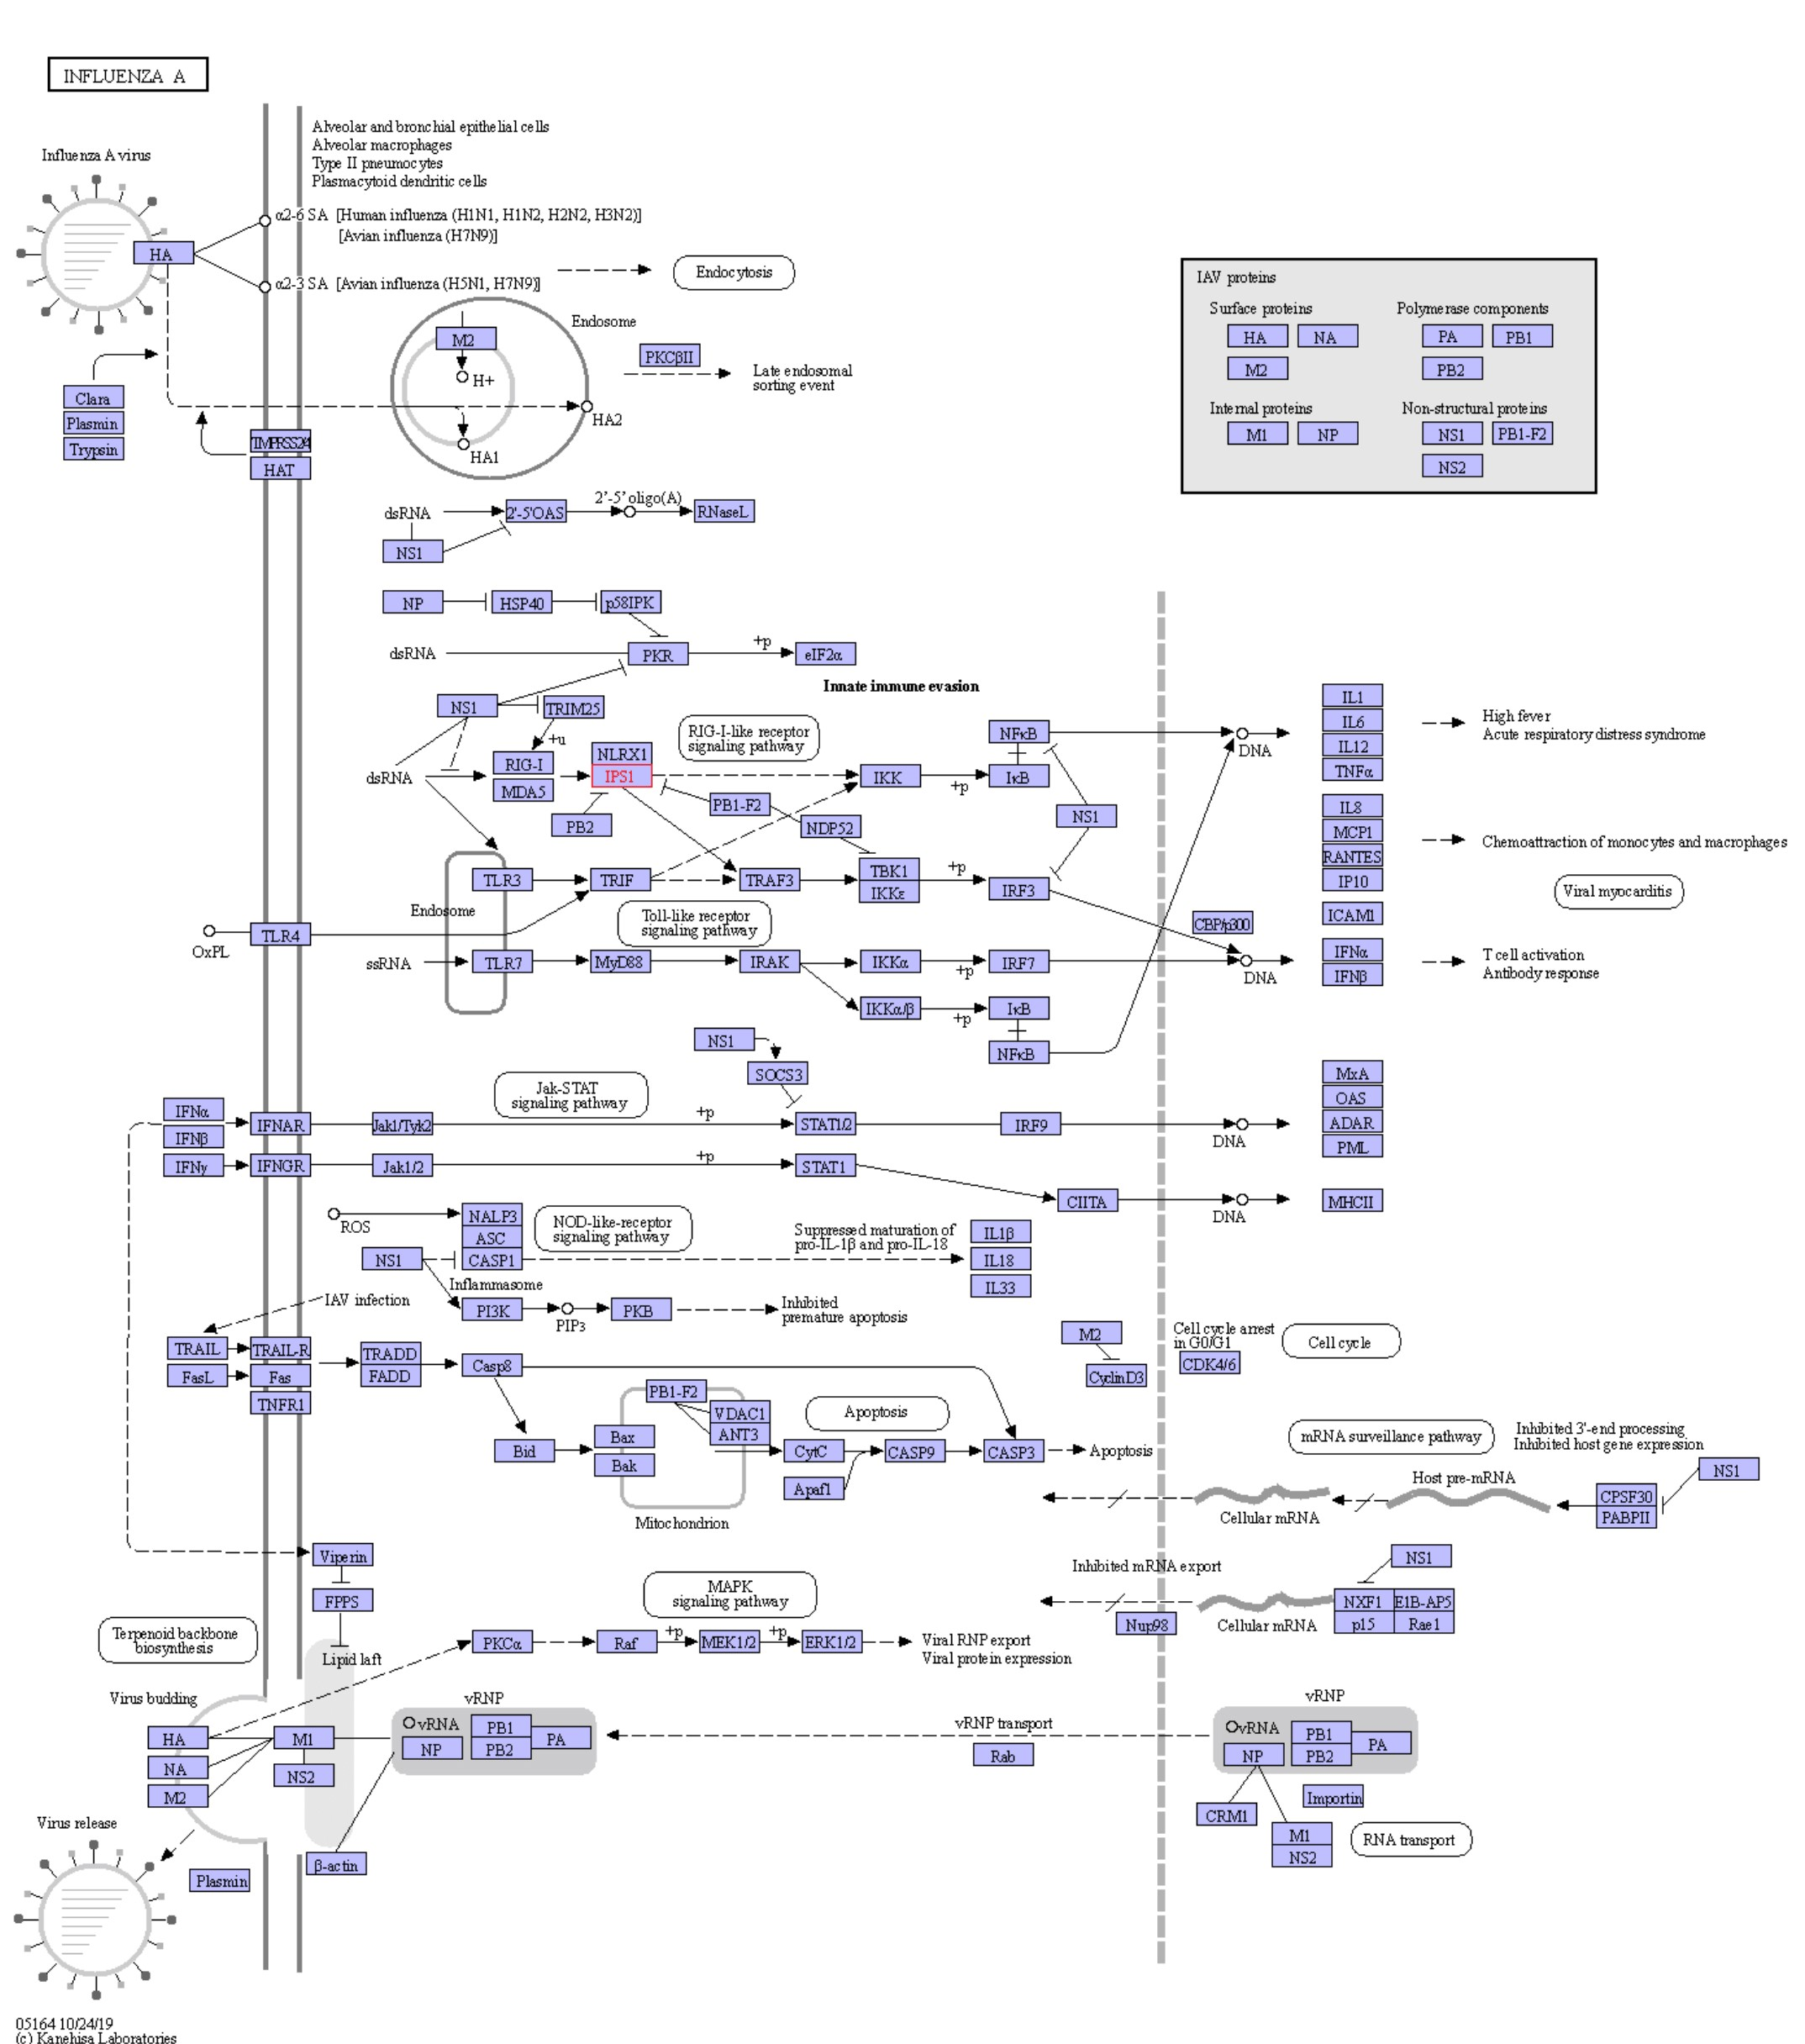

In [0]:
# Influenza pathway: https://www.genome.jp/kegg-bin/show_pathway?hsa05164 [4]
Image(data='KEGG PATHWAY_ Influenza_A.jpg')

## More Background...
* Krogan paper found 332 protein interactions between SARS-CoV2 & host using HEK cells [2]
* Gene Ontology was used to infer which host processes could be affected by SARS-CoV2 
* Other literature was used to validate these inferences
* But we remain unsure of which PPI’s are pathogenic and which are spurious
* We can leverage Krogan PPI data to subset important interactions

* Kai Xia et al. 2006 integrated PPI and Gene Expression to infer regulatory gene modules involved in developmental transition from cell proliferation to differentiation [3]
* We followed the workflow from Figure 1
* TenOever paper speculates some kind of antagonist activity like IAV, but does not isolate any specific CoV2 antagonists.
* Krogan identifies broad range of PPI data, but does not necessarily conclude which ones are pathogenic
* By combining both datasets, we can infer an interaction network that explains symptoms of Covid-19

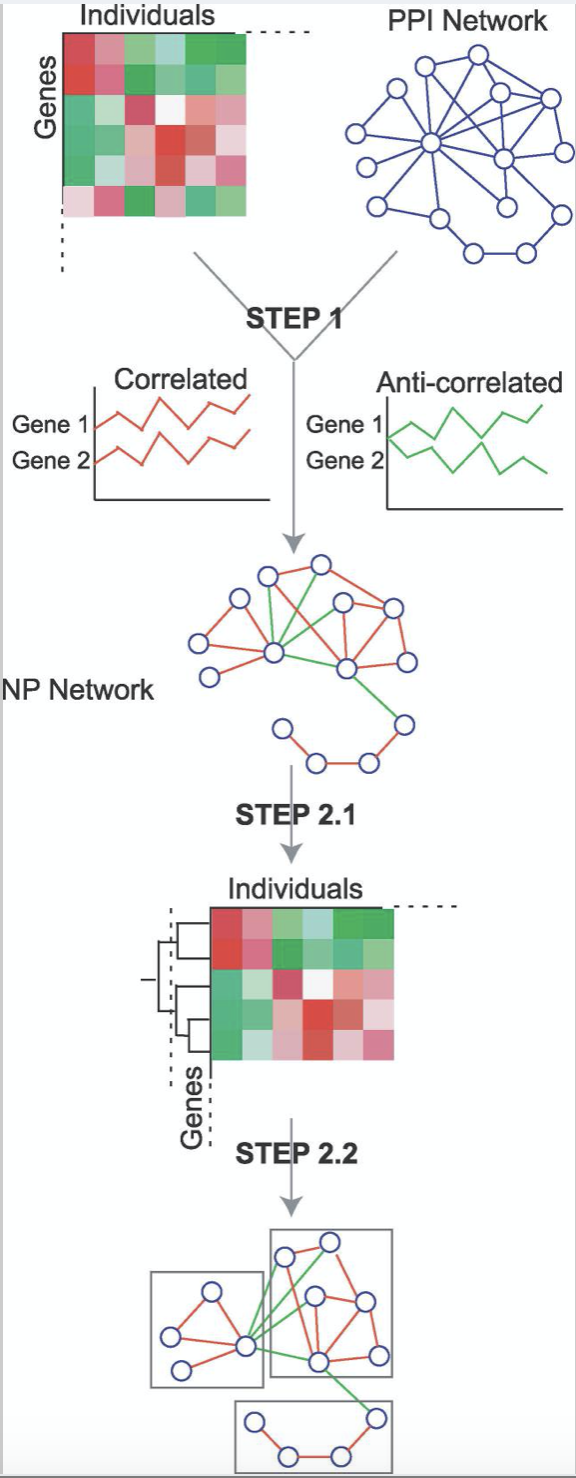

In [0]:
# Kai Xia et al. 2006. Figure 1
Image(data='XiaExprPpiIntegratin.png')

# Final Project

Taking inspiration from Kai Xia paper - focusing on Page 2 Figure 1, we want to develop the NP network of normal human bronchial epithelial (NHBE) cells. We will get out PPI network from the Korgan paper data and the expression data from GEO from Cell Paper _______________________.

See Kai Xia paper: 
https://www-ncbi-nlm-nih-gov.oca.ucsc.edu/pmc/articles/PMC1664705/
_ _ _

#Methods

###1. We need gene expression for human gene set and CoV2 gene set across experiments both with and without SARS-CoV2 infection.
  
>  a. Human gene expression data can be obtained from TenOever raw counts at Gene Expression Ominibus (GEO): # https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507

>   b. Sars-CoV2 RNA-Seq FASTQ files can be obtained from TenOever SRA: https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA615032&o=acc_s%3Aa
  
>  c. Align RNA-Seq raw reads from FASTQ to SARS-CoV2 reference genome from UCSC Genome Browser Downloads to generate a SAM file: http://hgdownload.soe.ucsc.edu/goldenPath/wuhCor1/bigZips/

>  d. Using SARS-CoV2 gene annotations from UCSC Table Browser mature gene products track, the raw counts can be computed from aligned reads (SAM): https://genome.ucsc.edu/cgi-bin/hgTracks?db=wuhCor1

>  e. Create a dataframe with TenOever experiments as columns and human + CoV2 genes as rows.

>  f. Filter out genes (rows) whose expression = 0 across all experiements.


###2. Integrate Krogan CoV2-Host PPI data into the STRING Host-Host PPI data to get a full protein interaction graph

>  a. Obtain full string database with annotations from: https://string-db.org/cgi/download.pl?sessionId=tSNhIABScntm

>  b. Filter STRING interactions network to the subset of genes in the TenOever paper

>  c. Add the Krogan interactions to the string interaction where strength of evidence (edge weight) = Bayesian Probability * 1000

>  d. Filter network for strong evidence (edge weights >= 600)

###3. Create an NP graph from the STRING + Krogan PPI and TenOever Gene Expression dataframe. 
  
>  a. For every pair of genes in a PPI, calculate the correlation across expression experiments (for infected and non-infected patients or cell lines). 
  
>  b. In figure below, we calc PCC for each pair of matrix ROWS
  
>  c. “we focused on the subnetwork that consists of only interactions between gene pairs that are transcriptionally correlated and anti-correlated” using a abs(PCC) > 0.8
  
###4. From this subnetwork, perform hierarchical clustering (we can use Scikit for this) and visualize with TreeViz…

>  a. Filter the gene expression dataframe for genes that occur in the NP network

>  b. Perform hierarchical clustering on the gene expression dataframe

>  c. Perform sub-clustering based on the CoV2 genes to isolate network control modules

###5. Create the relevant network modules from clusters

>  a. Extract NP network noeds and edges for each cluster and visualize these control modules using Cytoscape

>  b. Search GO for genes in each module to determine their enrichments & functions

#Results
* There are clearly defined clusters of genes that involve both the SARS-cov2 and host immune system genes.
* SARS-CoV2 ns8 (also called ORF8) and ORF3a - they both are highly correlated and connected to the host proteins and gene expression.
* Diffusion of both genes clearly affects numerous host genes in our NP netowork model, but we need to use Gene Ontology to understand their function.
* For example, in the diffusion of ORF3a we see that the host gene CXCL2 is affected and is part of cytokine and chemokine host response. The part of the cytokine and chemokine network that is responsible for inflammatory respone that has caused patient complications [9] [10][11].

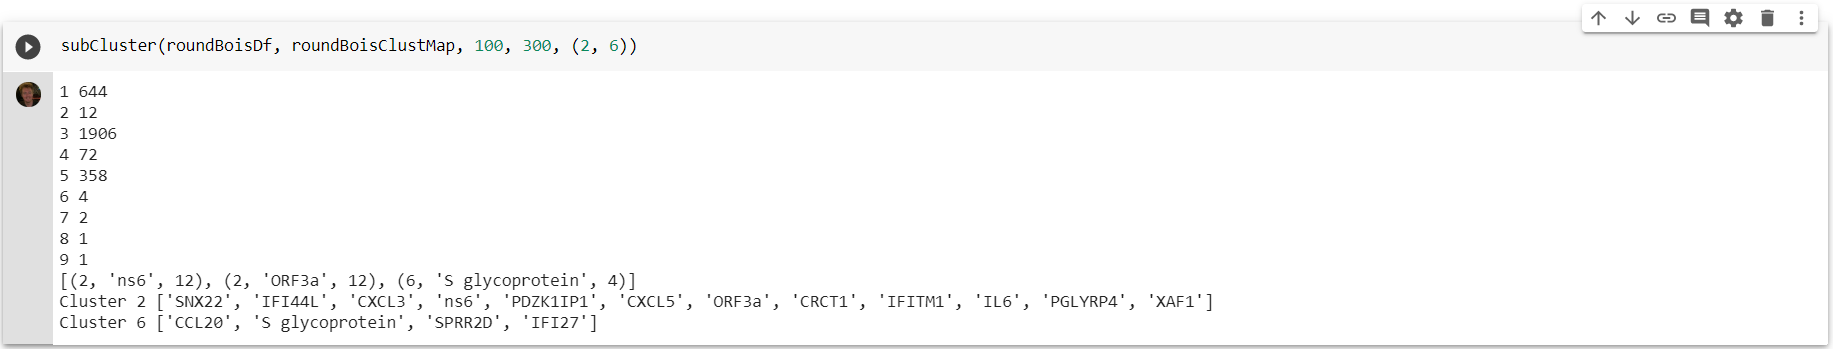

In [273]:
Image(data='round_bois_result.png')

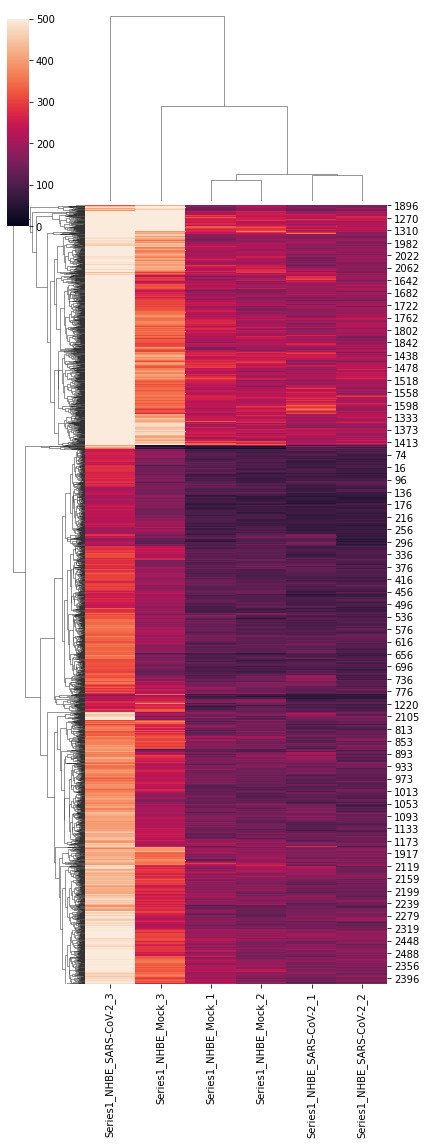

In [272]:
Image(data='round_bois_heatmap.png')

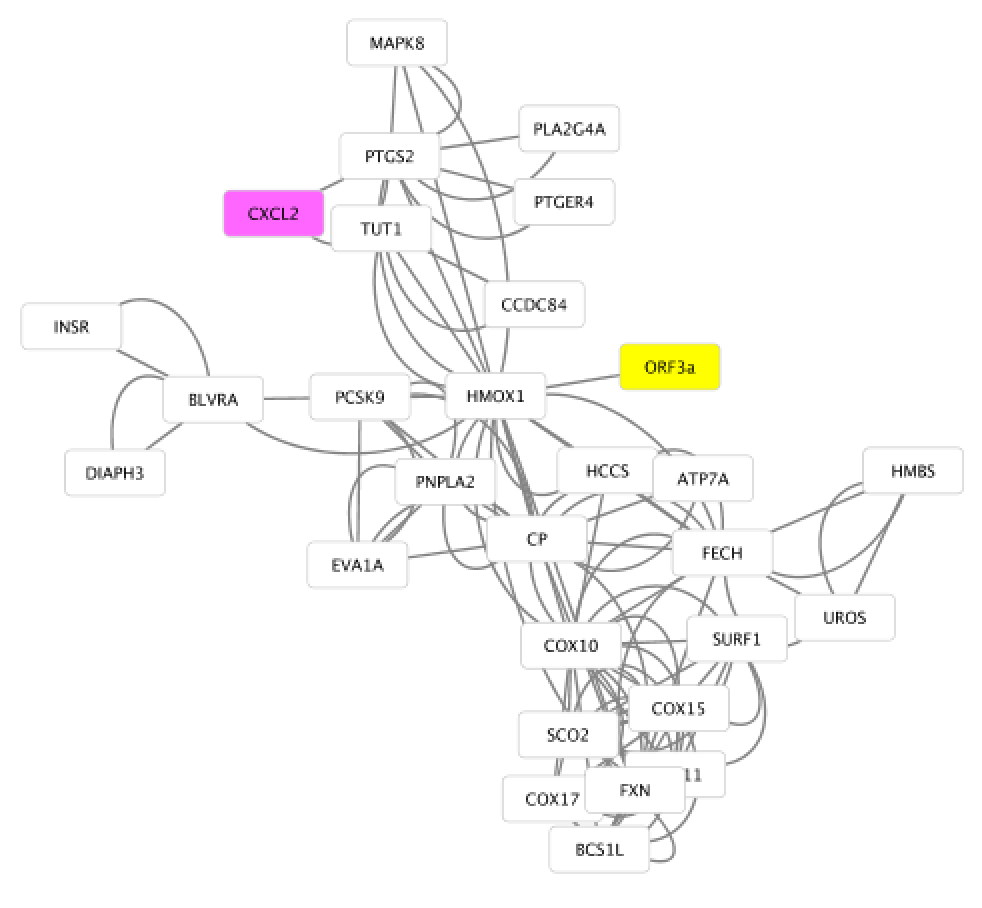

In [266]:
Image(data='orf3a_diffusion.png')

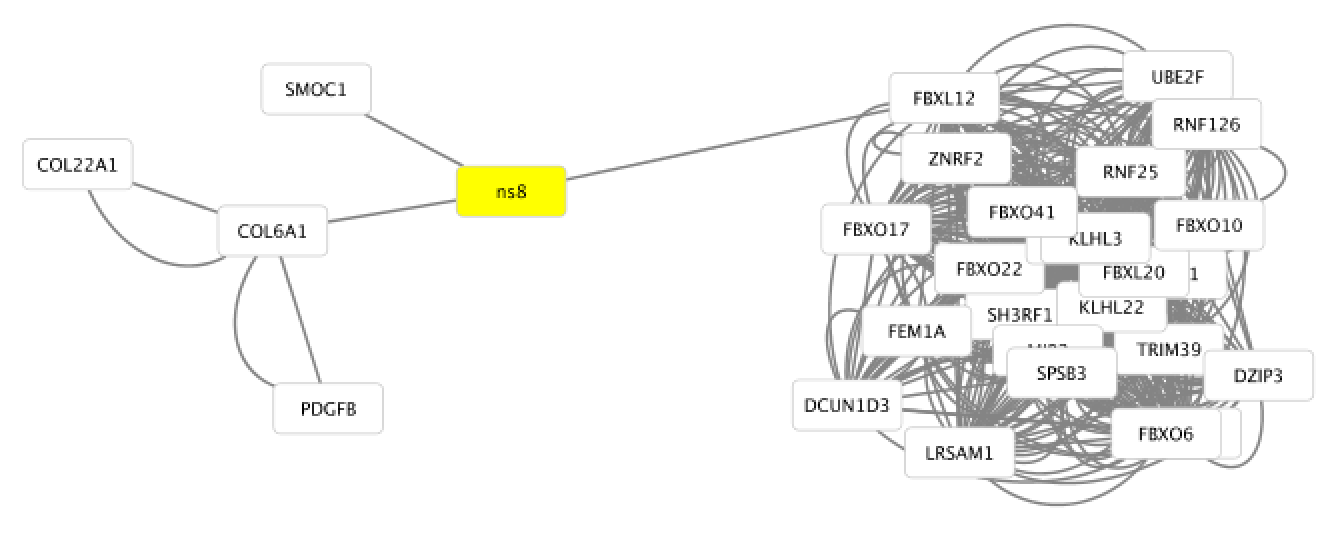

In [267]:
Image(data='ns8_diffusion.png')

#Data sets used
* SARS-CoV2 reference genome from UCSC Genome Browser
* SARS-CoV2 gene annotations from UCSC Genome Browser

#Acknowledgements
We thank BME-230B professors Dr. Josh Stuart and Dr. Benedict Paten for their systems biology and genome alignment instruction that made this project possible. We also thank the BME-230B TA's Ioannis Anastopoulos and Lucas Seninge for their guidance and sharing datasets for this project on the Google Drive.

#Citations
[1] Blanco Melo, Daniel et al. "Imbalanced Host Response to SARS-CoV-2 Drives Development of COVID-19." Cell (2020): n. pag. Web. https://www.cell.com/cell/pdf/S0092-8674(20)30489-X.pdf

[2] Gordon, David E et al. “A SARS-CoV-2 Protein Interaction Map Reveals Targets for Drug Repurposing.” Nature (2020): n. pag. Web. https://www.nature.com/articles/s41586-020-2286-9

[3] Xia, Kai et al. “Identification of the Proliferation/Differentiation Switch in the Cellular Network of Multicellular Organisms (Proliferation/Differentiation Switch).” PLoS Computational Biology 2.11 (2006): e145. Web. https://www-ncbi-nlm-nih-gov.oca.ucsc.edu/pmc/articles/PMC1664705/

[4] KEGG Kanehisa, M. and Goto, S.; KEGG: Kyoto Encyclopedia of Genes and Genomes. Nucleic Acids Res. 28, 27-30 (2000). [pubmed] [doi]
KEGG Influenza Pathway: https://www.genome.jp/kegg-bin/show_pathway?hsa05164

[5] UCSC Genome Browser: Kent WJ, Sugnet CW, Furey TS, Roskin KM, Pringle TH, Zahler AM, Haussler D. The human genome browser at UCSC. Genome Res. 2002 Jun;12(6):996-1006.

[6] Bowtie2: Langmead B, Salzberg S. Fast gapped-read alignment with Bowtie 2. Nature Methods. 2012, 9:357-359.

[7] SAMtools: Li, Heng et al. “The Sequence Alignment/Map Format and SAMtools.” Bioinformatics 25.16 (2009): 2078–2079. Web.

[8] SRA Toolkit: https://trace.ncbi.nlm.nih.gov/Traces/sra/sra.cgi?view=toolkit_doc

[9] Ashburner et al. Gene ontology: tool for the unification of biology. Nat Genet. May 2000;25(1):25-9.

[10] The Gene Ontology Consortium. The Gene Ontology Resource: 20 years and still GOing strong. Nucleic Acids Res. Jan 2019;47(D1):D330-D338.

[11] Carbon S, Ireland A, Mungall CJ, Shu S, Marshall B, Lewis S, AmiGO Hub, Web Presence Working Group. AmiGO: online access to ontology and annotation data. Bioinformatics. Jan 2009;25(2):288-289.




In [0]:
!pip install scanpy
!pip install gseapy
!pip install -q biopython
import scanpy as sc
import gseapy as gp
import Bio

In [0]:
# Some useful imports
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import gmean
from sklearn.metrics import adjusted_rand_score
import scipy
from collections import OrderedDict
from seaborn import clustermap
from scipy.cluster import hierarchy
from sklearn.metrics.pairwise import euclidean_distances
import gzip

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Local data source file handles used by this notebook:

# New TenOever data from Gene Expression Ominbus (GEO) that contains ACE2 expressing A549 and NS1 knockout NHBE cell experiments:
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507
TENOEVER_ALL_EXP = 'GSE147507_RawReadCounts_Human.tsv'

# RNA-Seq experiments for genome-wide host dependency factors exploited by IAV for human cell infection
A549_CRISPR_FILE = 'A549_Crispr_Knockout_RNASeq/GSE141171_flu1.rsem.genes.counts.txt'

# Immuno precip assay for all human host proteins bound by IAV NS1 from this paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701712/
HOST_NS1_TARGETS = 'ppat.1003440.s002.csv'

# STRING database filtered by tenOever differentially expressed genes in Covid-19 and IAV infections; should change this network to include GO interferon nodes:
STRING_SUBNETWORK = 'reducedLinksA549filter800.txt.sif'

# RNA-Seq raw read counts from TenOever paper for NHBE cells used for control and SARS-CoV2 infection
EXPRESSION_ALL_GENES = 'viralAndHostGenesDf.csv'

# This is the full STRING protein interaction database that we can filter down to our particular gene set (nodes) and evidence level (connection score threshold, ie 800)
STRING_FULL_NETWORK = '9606.protein.links.v11.0.txt.gz'

# This is the full STRING protein name mapping file from protein_ID to common name
STRING_NAME_MAP = '9606.protein.info.v11.0.txt.gz'

# Contains the list of CoV2 genes (bait) and human genes (prey) and their MIST scores from PPI experiments
KROGAN_PPI_DATA = 'media-5.xlsx'

# A text file containing all edges of STRING PPI network relevant for genes expressed in TenOever paper + CoV2 genes in Krogan PPI
EXPR_PPI_NETWORK = 'nhbeGeneNetworkCov.txt'

# A text file that maps STRING protein names to their common gene names
GENE_NAME_MAPPER = 'stringGeneNameMapper.txt'

# An NP network representing a subset of the EXPR_PPI_NETWORK. Edges in this network showed a high positive or anti-correlation using PCC.
NP_NETWORK = 'npNhbeGeneNetworkCov.txt'

# Annotation file of Sars-CoV2 genes from UCSC Genome Browser
COV_GTF = 'reference/cov2matureProductsTrack.gtf'

# translated gene_name edge matrix - filtered NP network
# for high confiedence evidence
FILTERED_EDGE_MATRIX = 'Np_edge_network_names_0.8_600.txt'

# Gene Ontology for immune system 
GO_INTERFERON = 'GO/Human_InterferonTypeI_GO.txt'
GO_CYTOKINE = 'GO/Human_CytokineResponse_GO.txt'
GO_CHEMOKINE = 'GO/Human_ChemokineActivity_GO.txt'
GO_VIRUS_POS = 'GO/Human_ResponseToVirus_GO.txt'
GO_VIRUS_NEG = 'GO/Human_NegResponseToVirus_GO.txt'

# We want to create a CoV2-Host interaction network that integrates both gene expression and protein-protein interaction data. We will need:
>Virus to host PPI data (Krogan supplements)

>Host to host PPI data (STRING)

>Host gene expression (TenOever supplements)

>Virus gene expression (GEO)

##TenOever raw counts only cover host genes. In order to get viral gene expression, we will need to align sequence read data from fastq files at GEO with Sars-CoV2 reference genome from UCSC genome browser.

# Table 1: RNA-Seq Biological & Technical Replicates
### https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA615032&o=acc_s%3Aa

\begin{array}{ccc}
\text{Description}&\text{Experiment}&\text{Sequence Run URL's}\\
\text{NHBE MOCK-1}&\text{SRX7990868}&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412223/SARS004-mock-1_S1_L001_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412224/SARS004-mock-1_S1_L002_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412225/SARS004-mock-1_S1_L003_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412226/SARS004-mock-1_S1_L004_R1_001.fastq.gz}\\
\text{NHBE MOCK-2}&\text{SRX7990867}&\text{https://sra-download.ncbi.nlm.nih.gov/traces/sra60/SRR/011144/SRR11412219}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412220/SARS004-mock-2_S2_L002_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412221/SARS004-mock-2_S2_L003_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412222/SARS004-mock-2_S2_L004_R1_001.fastq.gz}\\
\text{NHBE MOCK-3}&\text{SRX7990866}&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412215/SARS004-mock-3_S3_L001_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412216/SARS004-mock-3_S3_L002_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412217/SARS004-mock-3_S3_L003_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412218/SARS004-mock-3_S3_L004_R1_001.fastq.gz}\\
\text{NHBE CoV2-1}&\text{SRX7990871}&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412235/SARS004-CoV2-1_S4_L001_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412236/SARS004-CoV2-1_S4_L002_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412237/SARS004-CoV2-1_S4_L003_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412238/SARS004-CoV2-1_S4_L004_R1_001.fastq.gz}\\
\text{NHBE CoV2-2}&\text{SRX7990870}&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412231/SARS004-CoV2-2_S5_L001_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412232/SARS004-CoV2-2_S5_L002_R1_001.fastq.gz}\\
~&~&\text{https://sra-download.ncbi.nlm.nih.gov/traces/sra24/SRR/011144/SRR11412233}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412234/SARS004-CoV2-2_S5_L004_R1_001.fastq.gz}\\
\text{NHBE CoV2-3}&\text{SRX7990869}&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412227/SARS004-CoV2-3_S6_L001_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412228/SARS004-CoV2-3_S6_L002_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412229/SARS004-CoV2-3_S6_L003_R1_001.fastq.gz}\\
~&~&\text{https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412230/SARS004-CoV2-3_S6_L004_R1_001.fastq.gz}\\
\end{array}

In [0]:
# First we need the raw RNA-Seq data from TenOever paper on GEO; this is just 1 run out of a dozen or so...

os.chdir("/content/drive/My Drive/BME-230B/sra")
# !wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11517741/A549-Adeno-GFP-ACE2-SARS-CoV2-3-indexH12_S24_L001_R1_001.fastq.gz

###########
# SERIES 1
###########

# MOCK-1 SRX7990868
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412223/SARS004-mock-1_S1_L001_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412224/SARS004-mock-1_S1_L002_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412225/SARS004-mock-1_S1_L003_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412226/SARS004-mock-1_S1_L004_R1_001.fastq.gz

# MOCK-2 SRX7990867
# ! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412219/SARS004-mock-2_S2_L001_R1_001.fastq.gz # BAD URL
### Requires SRA toolkit: https://trace.ncbi.nlm.nih.gov/Traces/sra/sra.cgi?view=toolkit_doc
! wget https://sra-download.ncbi.nlm.nih.gov/traces/sra60/SRR/011144/SRR11412219
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412220/SARS004-mock-2_S2_L002_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412221/SARS004-mock-2_S2_L003_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412222/SARS004-mock-2_S2_L004_R1_001.fastq.gz

# MOCK-3 SRX7990866
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412215/SARS004-mock-3_S3_L001_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412216/SARS004-mock-3_S3_L002_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412217/SARS004-mock-3_S3_L003_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412218/SARS004-mock-3_S3_L004_R1_001.fastq.gz

# COV2-1 SRX7990871
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412235/SARS004-CoV2-1_S4_L001_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412236/SARS004-CoV2-1_S4_L002_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412237/SARS004-CoV2-1_S4_L003_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412238/SARS004-CoV2-1_S4_L004_R1_001.fastq.gz

# COV2-2 SRX7990870
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412231/SARS004-CoV2-2_S5_L001_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412232/SARS004-CoV2-2_S5_L002_R1_001.fastq.gz
# ! wget https://storage.googleapis.com/sra-pub-src-5/SRR11412233/SARS004-CoV2-2_S5_L003_R1_001.fastq.gz.1 # prob won't work
### Requires SRA toolkit: https://trace.ncbi.nlm.nih.gov/Traces/sra/sra.cgi?view=toolkit_doc
! wget https://sra-download.ncbi.nlm.nih.gov/traces/sra24/SRR/011144/SRR11412233
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412234/SARS004-CoV2-2_S5_L004_R1_001.fastq.gz

# COV2-3 SRX7990869
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412227/SARS004-CoV2-3_S6_L001_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412228/SARS004-CoV2-3_S6_L002_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412229/SARS004-CoV2-3_S6_L003_R1_001.fastq.gz
! wget https://sra-pub-sars-cov2.s3.amazonaws.com/sra-src/SRR11412230/SARS004-CoV2-3_S6_L004_R1_001.fastq.gz

os.chdir("/content/drive/My Drive/BME-230B")

In [0]:
# Get the Sars-CoV2 reference genome: http://hgdownload.soe.ucsc.edu/goldenPath/wuhCor1/bigZips/
!wget http://hgdownload.soe.ucsc.edu/goldenPath/wuhCor1/bigZips/wuhCor1.2bit
!wget http://hgdownload.soe.ucsc.edu/goldenPath/wuhCor1/bigZips/wuhCor1.chrom.sizes

# And the 2-bit to fa converter
# twoBitToFa - Convert all or part of .2bit file to fasta
# usage:
#    twoBitToFa input.2bit output.fa
# options:
#    -seq=name       Restrict this to just one sequence.
#    -start=X        Start at given position in sequence (zero-based).
#    -end=X          End at given position in sequence (non-inclusive).
#    -seqList=file   File containing list of the desired sequence names 
#                    in the format seqSpec[:start-end], e.g. chr1 or chr1:0-189
#                    where coordinates are half-open zero-based, i.e. [start,end).
#    -noMask         Convert sequence to all upper case.
#    -bpt=index.bpt  Use bpt index instead of built-in one.
#    -bed=input.bed  Grab sequences specified by input.bed. Will exclude introns.
#    -bedPos         With -bed, use chrom:start-end as the fasta ID in output.fa.
#    -udcDir=/dir/to/cache  Place to put cache for remote bigBed/bigWigs.
#
# Sequence and range may also be specified as part of the input
# file name using the syntax:
#       /path/input.2bit:name
#    or
#       /path/input.2bit:name
#    or
#       /path/input.2bit:name:start-end

!mkdir reference
os.chdir("/content/drive/My Drive/BME-230B/reference")
!wget http://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
!chmod u+x twoBitToFa
!./twoBitToFa wuhCor1.2bit wuhCor1.fa

In [0]:
# Check our Sars-CoV2 ref sequence

os.chdir("/content/drive/My Drive/BME-230B/reference")
!head wuhCor1.fa

In [0]:
# Next, we need to align the reads to our reference using Bowtie
# We can try Alex Bagi's workflow from BME-110
# https://canvas.ucsc.edu/courses/25111/pages/discussion-week-7-rna-seq

We will need Bowtie2 and Samtools
!wget https://sourceforge.net/projects/bowtie-bio/files/bowtie2/2.4.1/bowtie2-2.4.1-linux-x86_64.zip/download
!wget https://github.com/samtools/samtools/releases/download/1.10/samtools-1.10.tar.bz2
!tar -xf samtools-1.10.tar.bz2
os.chdir("/content/drive/My Drive/BME-230B/bowtie2")
!unzip bowtie2-2.4.1-linux-x86_64.zip
os.chdir("/content/drive/My Drive/BME-230B")

In [0]:
# Build Samtools -- www.htslib.org/downloads/

os.chdir("/content/drive/My Drive/BME-230B")
!samtools-1.10/configure --prefix="/content/drive/My Drive/BME-230B/samtools/"
os.chdir("/content/drive/My Drive/BME-230B/samtools-1.10")
!pwd
!make
!make install
os.chdir("/content/drive/My Drive/BME-230B")

In [0]:
# We also need SRA Toolkit for some of the datasets -- https://github.com/ncbi/sra-tools/wiki/01.-Downloading-SRA-Toolkit
os.chdir("/content/drive/My Drive/BME-230B/sra")
# !wget https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/2.10.7/sratoolkit.2.10.7-ubuntu64.tar.gz
# !gzip sratoolkit.2.10.7-ubuntu64.tar
!tar -vxzf sratoolkit.2.10.7-ubuntu64.tar.gz

sratoolkit.2.10.7-ubuntu64/
sratoolkit.2.10.7-ubuntu64/CHANGES
sratoolkit.2.10.7-ubuntu64/example/
sratoolkit.2.10.7-ubuntu64/example/perl/
sratoolkit.2.10.7-ubuntu64/example/perl/base-stats.pl
sratoolkit.2.10.7-ubuntu64/example/perl/dump-reference.pl
sratoolkit.2.10.7-ubuntu64/example/perl/gene-lookup.pl
sratoolkit.2.10.7-ubuntu64/example/perl/mismatch-stats.pl
sratoolkit.2.10.7-ubuntu64/example/perl/quality-stats.pl
sratoolkit.2.10.7-ubuntu64/example/perl/simplefastq.pl
sratoolkit.2.10.7-ubuntu64/example/perl/splitfastq.pl
sratoolkit.2.10.7-ubuntu64/schema/
sratoolkit.2.10.7-ubuntu64/schema/align/
sratoolkit.2.10.7-ubuntu64/schema/align/align.vschema
sratoolkit.2.10.7-ubuntu64/schema/align/mate-cache.vschema
sratoolkit.2.10.7-ubuntu64/schema/align/pileup-stats.vschema
sratoolkit.2.10.7-ubuntu64/schema/align/qstat.vschema
sratoolkit.2.10.7-ubuntu64/schema/align/refseq.vschema
sratoolkit.2.10.7-ubuntu64/schema/align/seq.vschema
sratoolkit.2.10.7-ubuntu64/schema/csra2/
sratoolkit.2.10.7

In [0]:
# Convert any SRA datasets to fastq

os.chdir("/content/drive/My Drive/BME-230B/sra/sratoolkit.2.10.7-ubuntu64/bin")
!chmod u+x fastq-dump-orig.2.10.7
 # This is Covid series 5
!./fastq-dump-orig.2.10.7 SRR11412233 -o ../..
# This is Mock Series 2
!./fastq-dump-orig.2.10.7 SRR11412219 -o ../..


Usage:
  ./fastq-dump-orig.2.10.7 [options] <path> [<path>...]
  ./fastq-dump-orig.2.10.7 [options] <accession>

Use option --help for more information

./fastq-dump-orig.2.10.7 : 2.10.7

Read 3814880 spots for SRR11412233
Written 3814880 spots for SRR11412233
Read 4106965 spots for SRR11412219
Written 4106965 spots for SRR11412219


In [0]:
# 1) Build the index -- http://bowtie-bio.sourceforge.net/bowtie2/manual.shtml#getting-started-with-bowtie-2-lambda-phage-example

os.chdir("/content/drive/My Drive/BME-230B")
!mkdir sam bam bedgraph bigwig index log cuffdiff
os.chdir("/content/drive/My Drive/BME-230B/bowtie2-2.4.1-linux-x86_64")
!pwd
!export BT2_HOME="/content/drive/My Drive/BME-230B/bowtie2-2.4.1-linux-x86_64"
!chmod u+x bowtie2-build
!./bowtie2-build ../reference/wuhCor1.fa ../index/wuhCor1
os.chdir("/content/drive/My Drive/BME-230B/samtools")
!pwd
!chmod u+x samtools
!samtools faidx ../reference/wuhCor1.fa
!cut -f 1,2 ../reference/wuhCor1.fa.fai > ../reference/wuhCor1_chr.sizes

In [0]:
# Check the sequence read file

os.chdir("/content/drive/My Drive/BME-230B/sra")
!gzip -d A549-Adeno-GFP-ACE2-SARS-CoV2-3-indexH12_S24_L001_R1_001.fastq.gz
!head A549-Adeno-GFP-ACE2-SARS-CoV2-3-indexH12_S24_L001_R1_001.fastq

In [0]:
# 2) Align reads -- this takes 20 minutes per experiment and there are 6 experiments
# bowtie2 -x ../index/ecolik12 -1 ../sra/wt_1.fastq -2 ../sra/wt_2.fastq > ../sam/ecolik12_wt.sam 
# bowtie2 -x ../index/ecolik12 -1 ../sra/soxs_1.fastq -2 ../sra/soxs_2.fastq > ../sam/ecolik12_soxs.sam 
# !make
# !export $PATH=$PATH:/content/drive/My\ Drive/BME-230B/bowtie2-2.4.1-linux-x86_64
# !echo "PATH=$PATH:$BT2_HOME" >> ~/.bashrc

# os.chdir("/content/drive/My Drive/BME-230B/bowtie2-2.4.1-linux-x86_64")
# os.chdir("/content/drive/My Drive/BME-230B/bowtie2")
# !unzip bowtie2-2.4.1-linux-x86_64.zip
os.chdir("/content/drive/My Drive/BME-230B/bowtie2/bowtie2-2.4.1-linux-x86_64")
!chmod u+x bowtie2
!chmod u+x bowtie2-align-l
!chmod u+x bowtie2-align-l-debug
!chmod u+x bowtie2-align-s
!chmod u+x bowtie2-align-s-debug
!pwd
! echo 1
!./bowtie2 -x ../../index/wuhCor1 -U ../../sra/SARS004-CoV2-1_S4_L001_R1_001.fastq.gz | gzip > ../../sam/SRX7990871-1.sam.gz
! echo 2
!./bowtie2 -x ../../index/wuhCor1 -U ../../sra/SARS004-CoV2-1_S4_L002_R1_001.fastq.gz | gzip > ../../sam/SRX7990871-2.sam.gz
! echo 3
!./bowtie2 -x ../../index/wuhCor1 -U ../../sra/SARS004-CoV2-1_S4_L003_R1_001.fastq.gz | gzip > ../../sam/SRX7990871-3.sam.gz
! echo 4
!./bowtie2 -x ../../index/wuhCor1 -U ../../sra/SARS004-CoV2-1_S4_L004_R1_001.fastq.gz | gzip > ../../sam/SRX7990871-4.sam.gz

# We can align multiple files at once like this (samtools supports .gz compressed files, too, so no need to unzip first)
# But this ran out of RAM on Collab and crashed while counting the reads from 1 large sam file...
# ! echo 1
# ! ./bowtie2 -x ../../index/wuhCor1 -U ../../sra/SARS004-CoV2-1_S4_L001_R1_001.fastq.gz,../../sra/SARS004-CoV2-1_S4_L002_R1_001.fastq.gz,\
# ../../sra/SARS004-CoV2-1_S4_L003_R1_001.fastq.gz,../../sra/SARS004-CoV2-1_S4_L004_R1_001.fastq.gz | gzip > ../../sam/SRX7990871.sam.gz

/content/drive/My Drive/BME-230B/bowtie2/bowtie2-2.4.1-linux-x86_64
1
11099958 reads; of these:
  11099958 (100.00%) were unpaired; of these:
    11088626 (99.90%) aligned 0 times
    11332 (0.10%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
0.10% overall alignment rate
2
10939834 reads; of these:
  10939834 (100.00%) were unpaired; of these:
    10928499 (99.90%) aligned 0 times
    11335 (0.10%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
0.10% overall alignment rate
3
11177796 reads; of these:
  11177796 (100.00%) were unpaired; of these:
    11166378 (99.90%) aligned 0 times
    11418 (0.10%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
0.10% overall alignment rate
4
10993147 reads; of these:
  10993147 (100.00%) were unpaired; of these:
    10981785 (99.90%) aligned 0 times
    11362 (0.10%) aligned exactly 1 time
    0 (0.00%) aligned >1 times
0.10% overall alignment rate


# Now we have sam files for each of 6 experiments: 3 NHBE controls and 3 NHBE infected with CoV2. Next, we need raw counts for each viral gene, so we get the gene annotations from UCSC genome browser and count how many aligned reads overlap each gene.

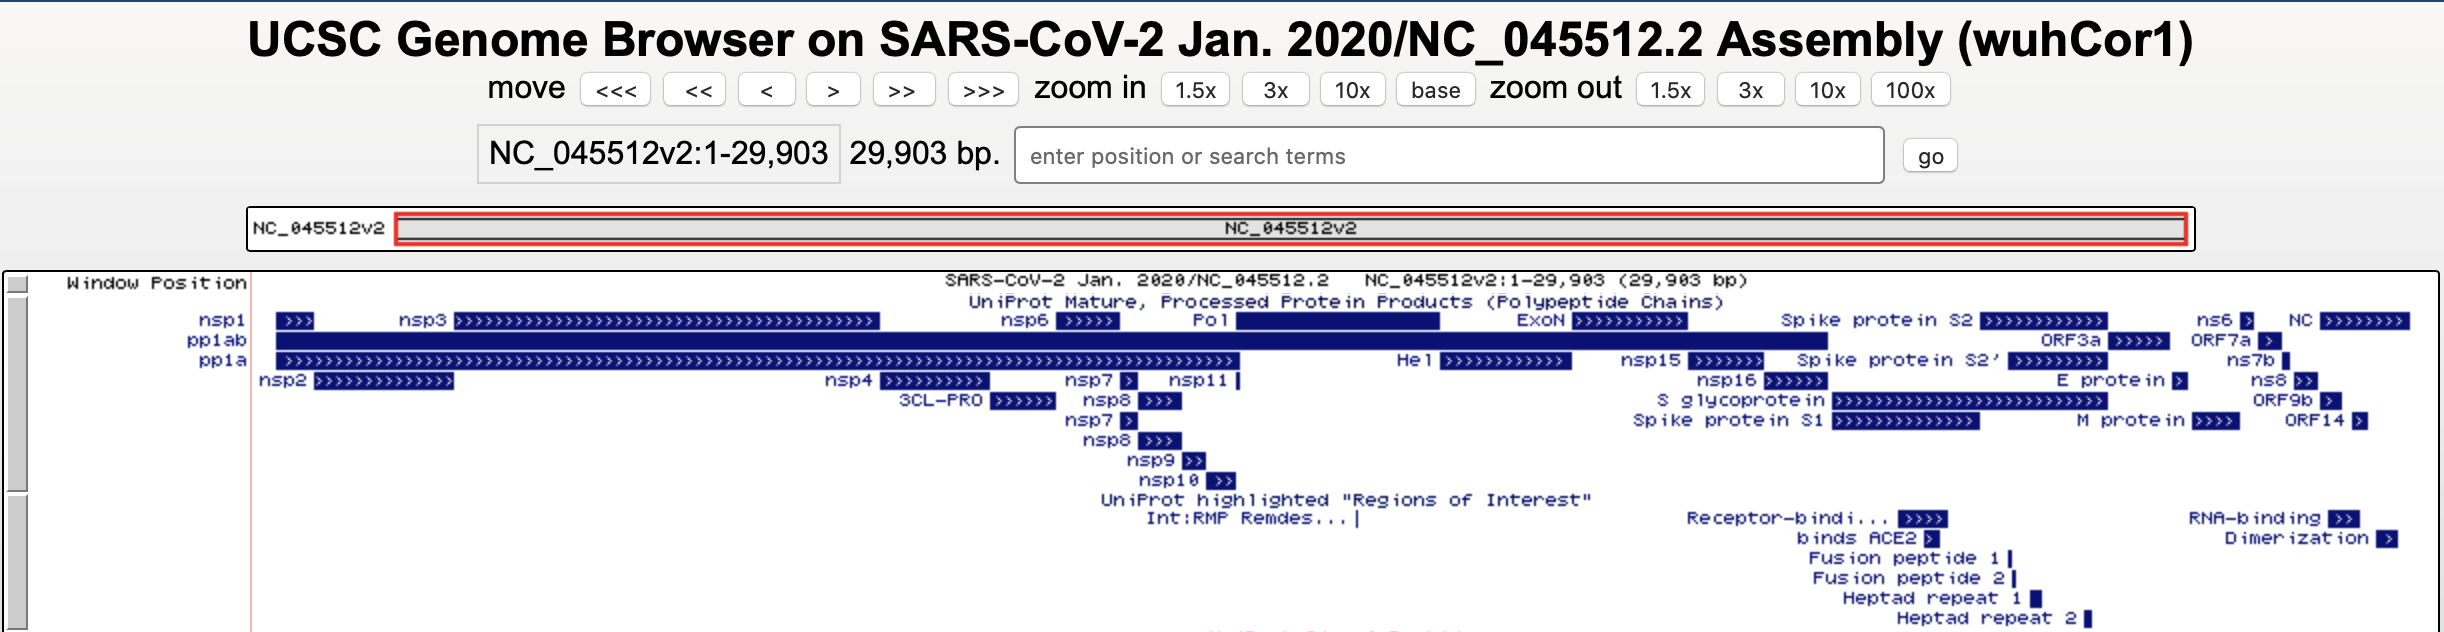

In [0]:
Image(data='GenomeBrowserCoV2.png')

In [0]:
# 3) Get raw read counts for each SARS-CoV2 gene
# Looks like we can use the app featureCounts for this: http://bioinf.wehi.edu.au/featureCounts/
# Another ref: https://www.biostars.org/p/213597/

# Get the Sars-CoV2 gene annotation file:
os.chdir("/content/drive/My Drive/BME-230B/reference")
# !wget http://hgdownload.soe.ucsc.edu/goldenPath/wuhCor1/bigZips/genes/ncbiGenes.gtf.gz
# !gzip -d ncbiGenes.gtf.gz
!head ncbiGenes.gtf

os.chdir("/content/drive/My Drive/BME-230B/sam")
!head -20 wuhCor1.sam 
# Get the featureCounts app:
# os.chdir("/content/drive/My Drive/BME-230B/featureCounts")

NC_045512v2	ncbiGenes.genePred	transcript	266	13483	.	+	.	gene_id "ORF1a"; transcript_id "ORF1a"; 
NC_045512v2	ncbiGenes.genePred	exon	266	13483	.	+	.	gene_id "ORF1a"; transcript_id "ORF1a"; exon_number "1"; exon_id "ORF1a.1";
NC_045512v2	ncbiGenes.genePred	CDS	266	13480	.	+	0	gene_id "ORF1a"; transcript_id "ORF1a"; exon_number "1"; exon_id "ORF1a.1";
NC_045512v2	ncbiGenes.genePred	start_codon	266	268	.	+	0	gene_id "ORF1a"; transcript_id "ORF1a"; exon_number "1"; exon_id "ORF1a.1";
NC_045512v2	ncbiGenes.genePred	stop_codon	13481	13483	.	+	0	gene_id "ORF1a"; transcript_id "ORF1a"; exon_number "1"; exon_id "ORF1a.1";
NC_045512v2	ncbiGenes.genePred	transcript	266	21555	.	+	.	gene_id "ORF1ab"; transcript_id "ORF1ab"; 
NC_045512v2	ncbiGenes.genePred	exon	266	13468	.	+	.	gene_id "ORF1ab"; transcript_id "ORF1ab"; exon_number "1"; exon_id "ORF1ab.1";
NC_045512v2	ncbiGenes.genePred	CDS	266	13468	.	+	0	gene_id "ORF1ab"; transcript_id "ORF1ab"; exon_number "1"; exon_id "ORF1ab.1";
NC_045512v2	ncb

In [0]:
# Let's write our own featureCount code! This will be easy for Sars-CoV2 :)
# Example gtf file record: NC_045512v2	ncbiGenes.genePred	transcript	266	13483	.	+	.	gene_id "ORF1a"; transcript_id "ORF1a";
# index 2 = transcript, index 3 = start, index 4 = end, index 8 = name (split on ; then space)
#
# And the 4th column of sam file gives us the read mapping: https://en.wikipedia.org/wiki/SAM_(file_format)

F1 = "sam/SRX7990871-1.sam.gz"
F2 = "sam/SRX7990871-2.sam.gz"
F3 = "sam/SRX7990871-3.sam.gz"
F4 = "sam/SRX7990871-4.sam.gz"
FOUT = "featureCounts/SRX7990871-counts.txt"
os.chdir("/content/drive/My Drive/BME-230B/")

locusDict = dict()
countDict = None

def countReads(samFileObjs, ld, cd):
    for s in samFileObjs:
        print("Counting sam file...")
        for line in s.readlines():
            if line[0] == '@':
                continue
            else:
                start = int(line.strip().split('\t')[3]) # Get these from columns
                for feature in list(ld.items()):
                    if start >= feature[1][0] and start <= feature[1][1]:
                        cd[feature[0]] += 1
                        # print(line.strip().split('\t')[9]) # Blast sequences for mock runs
                        break
                    else:    
                        continue

def saveCounts(f, cd):
    print("Writing file...")
    with open(f, 'w') as rc:
        for f in cd.items():
            rc.write("{0}\t{1}\n".format(f[0], f[1]))

with open(COV_GTF) as genes, gzip.open(F1, 'rt') as sam1, gzip.open(F2,'rt') as sam2, \
    gzip.open(F3, 'rt') as sam3, gzip.open(F4, 'rt') as sam4:
    for line in genes.readlines():
        # Get each gene name (key) and its int(start) & int(end) loci (values)
        record = line.strip().split('\t')
        geneName = record[8].split('"')[1]
        if record[2] == 'exon' or record[2] == 'CDS' and geneName == 'Pol':
            locusDict[geneName] = (int(record[3]), int(record[4]))
    print(locusDict)
    countDict = {key: int() for key in locusDict.keys()}
    print(countDict)

    countReads([sam1, sam2, sam3, sam4], locusDict, countDict)

saveCounts(FOUT, countDict)

{'nsp1': (266, 805), 'nsp2': (806, 2719), 'nsp3': (2720, 8554), 'nsp4': (8555, 10054), '3CL-PRO': (10055, 10972), 'nsp6': (10973, 11842), 'nsp7': (11843, 12091), 'nsp8': (12092, 12685), 'nsp9': (12686, 13024), 'nsp10': (13025, 13441), 'Pol': (13468, 16236), 'nsp11': (13442, 13480), 'Hel': (16237, 18039), 'ExoN': (18040, 19620), 'nsp15': (19621, 20658), 'nsp16': (20659, 21552), 'S glycoprotein': (21599, 25381), 'Spike protein S1': (21599, 23617), 'Spike protein S2': (23618, 25381), "Spike protein S2'": (24008, 25381), 'ORF3a': (25393, 26217), 'E protein': (26245, 26469), 'M protein': (26523, 27188), 'ns6': (27202, 27384), 'ORF7a': (27439, 27756), 'ns7b': (27756, 27884), 'ns8': (27939, 28256), 'ORF-9b': (28284, 28574), 'ORF14': (28734, 28952), 'pp1ab': (13468, 21552), 'pp1a': (266, 13480), 'NC': (28274, 29530)}
{'nsp1': 0, 'nsp2': 0, 'nsp3': 0, 'nsp4': 0, '3CL-PRO': 0, 'nsp6': 0, 'nsp7': 0, 'nsp8': 0, 'nsp9': 0, 'nsp10': 0, 'Pol': 0, 'nsp11': 0, 'Hel': 0, 'ExoN': 0, 'nsp15': 0, 'nsp16': 

In [0]:
# Combine the other RNA-seq runs into single experiments real quick...
from collections import defaultdict

EXP_LIST = ['SRX7990867', 'SRX7990868', 'SRX7990869', 'SRX7990870']

for e in EXP_LIST:
    fCount = defaultdict(int)
    for i in range(1, 5):
        with open('featureCounts/'+e+'-'+str(i)+'-counts.txt') as f:
            for line in f.readlines():
                record = line.strip().split('\t')
                feature = record[0]
                fCount[feature] += int(record[1])
    with open('featureCounts/'+e+'-counts.txt', 'w') as o:
        for item in fCount.items():
            o.write("{0}\t{1}\n".format(item[0], item[1]))

In [0]:
# Take a quick look at feature counts for each of the CoV2 genes
!cat featureCounts/SRX7990871-counts.txt

!head -30 sam/SRX7990871-1.sam

nsp1	291
nsp2	92
nsp3	73
nsp4	7
3CL-PRO	7
nsp6	4
nsp7	5
nsp8	43
nsp9	15
nsp10	20
Pol	46
nsp11	0
Hel	151
ExoN	64
nsp15	98
nsp16	62
S glycoprotein	1525
Spike protein S1	0
Spike protein S2	0
Spike protein S2'	0
ORF3a	452
E protein	12
M protein	4058
ns6	517
ORF7a	170
ns7b	37
ns8	960
ORF-9b	5996
ORF14	2553
pp1ab	0
pp1a	0
NC	22635
head: cannot open 'sam/SRX7990871-1.sam' for reading: No such file or directory


# Now it's time to integrate the Krogan Protein-Protein Interaction data that contains 26 viral proteins and 332 host protein interaction partners. We will add these interactions to the existing host protein interactions using STRING database.

In [0]:
# PPI data
ppi_cov2_data = pd.read_excel(KROGAN_PPI_DATA, header=1)
ppi_cov2_data.head()

,Bait,Preys,PreyGene,MIST,Saint_BFDR,AvgSpec,FoldChange,Uniprot Protein ID,Uniprot Protein Description,Uniprot Function,Structures (PDB),Uniprot Function in Disease
0,SARS-CoV2 nsp13,Q9UJC3,HOOK1,0.994048,0.0,24.00,240.00,HOOK1_HUMAN,Protein Hook homolog 1 (h-hook1) (hHK1),Required for spermatid differentiation. Proba...,NaN,NaN
1,SARS-CoV2 orf9b,Q7KZI7,MARK2,0.994041,0.0,22.33,223.33,MARK2_HUMAN,Serine/threonine-protein kinase MARK2 (EC 2.7....,Serine/threonine-protein kinase (PubMed:23666...,3IEC;5EAK;5KZ7;5KZ8,NaN
2,SARS-CoV2 nsp1,P49643,PRIM2,0.993975,0.0,4.67,46.67,PRI2_HUMAN,DNA primase large subunit (DNA primase 58 kDa ...,Regulatory subunit of the DNA primase complex...,3L9Q;3Q36;4BPU;4BPW;4BPX;4RR2;5DQO;5EXR;5F0Q;5...,NaN
3,SARS-CoV2 nsp13,Q9UHD2,TBK1,0.993971,0.0,7.00,70.00,TBK1_HUMAN,Serine/threonine-protein kinase TBK1 (EC 2.7.1...,Serine/threonine kinase that plays an essenti...,4EFO;4EUT;4EUU;4IM0;4IM2;4IM3;4IW0;4IWO;4IWP;4...,"Glaucoma 1, open angle, P (GLC1P) [MIM:177700..."
4,SARS-CoV2 orf9b,P27448,MARK3,0.993959,0.0,14.67,146.67,MARK3_HUMAN,MAP/microtubule affinity-regulating kinase 3 (...,Serine/threonine-protein kinase (PubMed:23666...,2QNJ;3FE3,Visual impairment and progressive phthisis bu...


In [0]:
# gonna remove the goods that I do not need
ppi_cov2_data = ppi_cov2_data.iloc[:, :5]

# we have 27 unique bait
print(ppi_cov2_data['Bait'].unique().shape)
ppi_cov2_data.head()
# gonna remove the goods that I do not need
ppi_cov2_data = ppi_cov2_data.iloc[:, :5]

# we have 27 unique bait
print(ppi_cov2_data['Bait'].unique().shape)
bait_df = ppi_cov2_data['Bait'].to_numpy()
bait_list = list()
for i in bait_df:
    name = i.split()
    bait_list.append(name[-1])

ppi_cov2_data['Bait'] = bait_list

conversion_dict = {

    # nsp11 not added because of 0 expression and Pol is right on top of it
    # ORF10 not added - because it and ORF9c are condsidered false ORFs

    'nsp13': 'Hel', 'orf9b': 'ORF-9b', 'nsp1': 'nsp1', 'M': 'M protein',
    'nsp5': '3CL-PRO', 'nsp12': 'Pol', 'orf8':'ns8', 'nsp14':'ExoN', 
    'orf3a':'ORF3a', 'nsp15':'nsp15', 'nsp9': 'nsp9', 'nsp10': 'nsp10',
    'nsp2': 'nsp2', 'nsp5_C145A': 'nsp5', 'Spike':'S glycoprotein', 'nsp8':'nsp8',
    'nsp6':'nsp6', 'nsp4':'nsp4', 'nsp7':'nsp7', 'orf7a':'ORF7a', 'E': 'E protein',
    'orf6': 'ns6', 'N':'NC', 'orf3b':'ORF3a'
}

ppi_cov2_data['Bait'].unique()

(27,)
(27,)


array(['nsp13', 'orf9b', 'nsp1', 'M', 'nsp5', 'nsp12', 'orf8', 'nsp14',
       'orf3a', 'nsp15', 'nsp9', 'orf9c', 'nsp2', 'nsp10', 'nsp8', 'nsp6',
       'nsp4', 'nsp5_C145A', 'Spike', 'nsp7', 'orf7a', 'E', 'orf6', 'N',
       'orf3b', 'orf10', 'nsp11'], dtype=object)

In [0]:
bait_names_expression_df = pd.read_csv('expressionBaitNames.txt', header = None)
bait_names_expression_df

,0
0,nsp1
1,nsp2
2,nsp3
3,nsp4
4,3CL-PRO
5,nsp6
6,nsp7
7,nsp8
8,nsp9
9,nsp10


In [0]:
def show_distribution(dataframe, labels, col):
    ''' Show distribution of bait targets '''
    # build dict and make distribution
    bait_composition = {_:0 for _ in labels}
    for label in dataframe[col]: bait_composition[label]+=1

    # now plot
    X = np.arange(labels.shape[0])
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X, bait_composition.values(), color = 'b', width = 0.5)
    plt.xlabel(col)
    plt.ylabel('Distribution')
    plt.xticks(ticks = list(range(labels.shape[0])), labels=list(bait_composition.keys()), rotation= 90)
    plt.show()

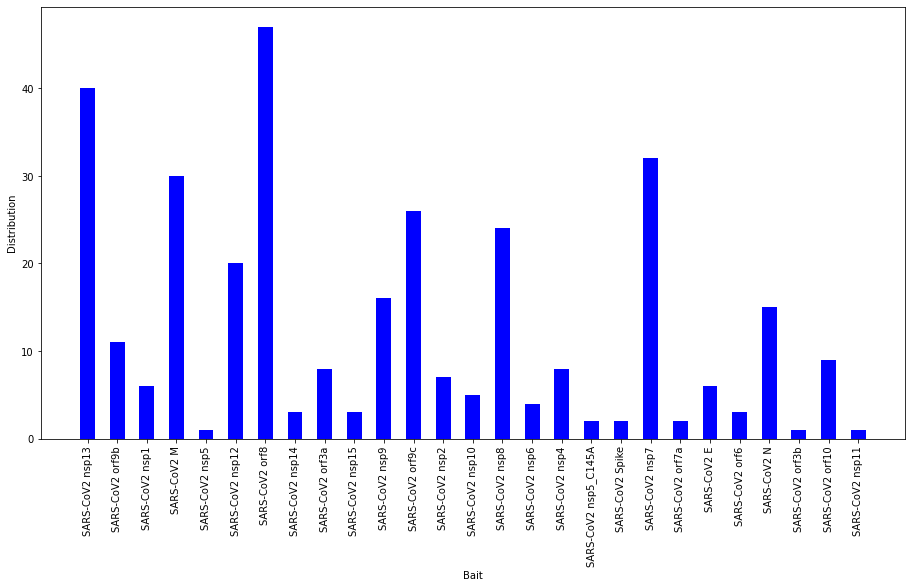

In [0]:
# call function to show distribution of tragets by bait
show_distribution(ppi_cov2_data, ppi_cov2_data['Bait'].unique(), 'Bait')

# Create expression dataframe for Human and Sars-CoV2 genes in NHBE cells

In [0]:
tenOeverDF = pd.read_csv(TENOEVER_ALL_EXP, sep='\t')

nhbeCovidExperiments = ['Unnamed: 0', 'Series1_NHBE_Mock_1', 'Series1_NHBE_Mock_2',
                        'Series1_NHBE_Mock_3', 'Series1_NHBE_SARS-CoV-2_1',
                        'Series1_NHBE_SARS-CoV-2_2', 'Series1_NHBE_SARS-CoV-2_3']
nhbeCovidExperiments_df = tenOeverDF.loc[:, nhbeCovidExperiments]

In [0]:
nhbeCovidExperiments_df.head()

,Unnamed: 0,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
0,DDX11L1,0,0,0,0,0,0
1,WASH7P,29,24,23,34,19,44
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0


In [0]:
# lets clean data set
dummy = nhbeCovidExperiments_df.iloc[:, 1:]

print(dummy.shape, nhbeCovidExperiments_df.shape)
print("Shape before dropping all-0 rows", nhbeCovidExperiments_df.shape)
drop_him = [i for i in range(dummy.shape[0])if (dummy.loc[i, :] == 0).all(axis=0)] # any(axis=0)] any isn't what we want...
# nhbeCovidExperiments_df = nhbeCovidExperiments_df.iloc[:, ]

nhbeCovidExperiments_df = nhbeCovidExperiments_df.drop(drop_him)
print("Shape after dropping all-0 rows", nhbeCovidExperiments_df.shape)
nhbeCovidExperiments_df.head()

(21797, 6) (21797, 7)
Shape before dropping all-0 rows (21797, 7)
Shape after dropping all-0 rows (16360, 7)


,Unnamed: 0,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
1,WASH7P,29,24,23,34,19,44
5,LOC729737,112,119,113,127,84,270
8,LOC100133331,19,21,36,16,23,54
12,LOC100288069,13,17,27,19,9,50
13,LINC00115,9,12,26,12,7,28


In [0]:
# Write dataframe so that we don't have to process again...

nhbeCovidExperiments_df.to_csv('nhbeExpressionDF.csv')

# With raw gene expression counts for each of 26 CoV2 genes, we can add these to the TenOever host raw counts NHBE dataframe.

In [0]:
# Add CoV2 genes to the human (host) gene expression DF
PATH = 'featureCounts/'
EXT = '-counts.txt'
COLS = ['Series1_NHBE_Mock_1',	'Series1_NHBE_Mock_2',	'Series1_NHBE_Mock_3',	'Series1_NHBE_SARS-CoV-2_1',	'Series1_NHBE_SARS-CoV-2_2',	'Series1_NHBE_SARS-CoV-2_3']
EXP = ['SRX7990866', 'SRX7990867', 'SRX7990868', 'SRX7990869', 'SRX7990870', 'SRX7990871']

covGeneList = None
linker = {key: val for key, val in zip(EXP, COLS)}
covidExprDict = {key: list() for key in COLS}
for e in EXP:
    with open(PATH+e+EXT) as f:
        genes = list()
        for line in f.readlines():
            rec = line.strip().split('\t')
            count = int(rec[1])
            covidExprDict[linker[e]].append(count)
            genes.append(rec[0])
        if not covGeneList:
            covGeneList = list(genes)
covidExprDict['Unnamed: 0'] = covGeneList

CoV2genesDF = pd.DataFrame.from_dict(covidExprDict, orient='columns')
# dropRows = [i for i in range(CoV2genesDF.shape[0]) if (CoV2genesDF.iloc[i,:-1] == 0).all(axis=0)]
# print(CoV2genesDF.iloc[0, :-1])
# print(dropRows)
CoV2genesDF = CoV2genesDF.drop([i for i in range(CoV2genesDF.shape[0]) if (CoV2genesDF.iloc[i,:-1] == 0).all(axis=0)])

CoV2genesDF['Unnamed: 0'].to_csv('expressionBaitNames.txt', index=False, header=False)
print(nhbeCovidExperiments_df.shape)
viralAndHostGenesDf = nhbeCovidExperiments_df.append(CoV2genesDF, ignore_index=True)
print(viralAndHostGenesDf.shape)
viralAndHostGenesDf.tail(32)

(16360, 7)
(16386, 7)


,Unnamed: 0,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
16354,CLIC2,3,2,3,2,0,19
16355,TMLHE,139,124,182,81,115,360
16356,SPRY3,18,9,34,20,26,45
16357,VAMP7,214,208,442,179,190,517
16358,DDX3Y,0,0,0,0,0,1
16359,CD24,18608,20056,36287,15633,16111,47077
16360,nsp1,2,0,5,82,39,291
16361,nsp2,4,1,3,74,66,92
16362,nsp3,6,4,10,34,12,73
16363,nsp4,1,0,1,2,3,7


In [0]:
# Save the full DF so we don't need to rebuild
viralAndHostGenesDf.to_csv('viralAndHostGenesDf.csv')

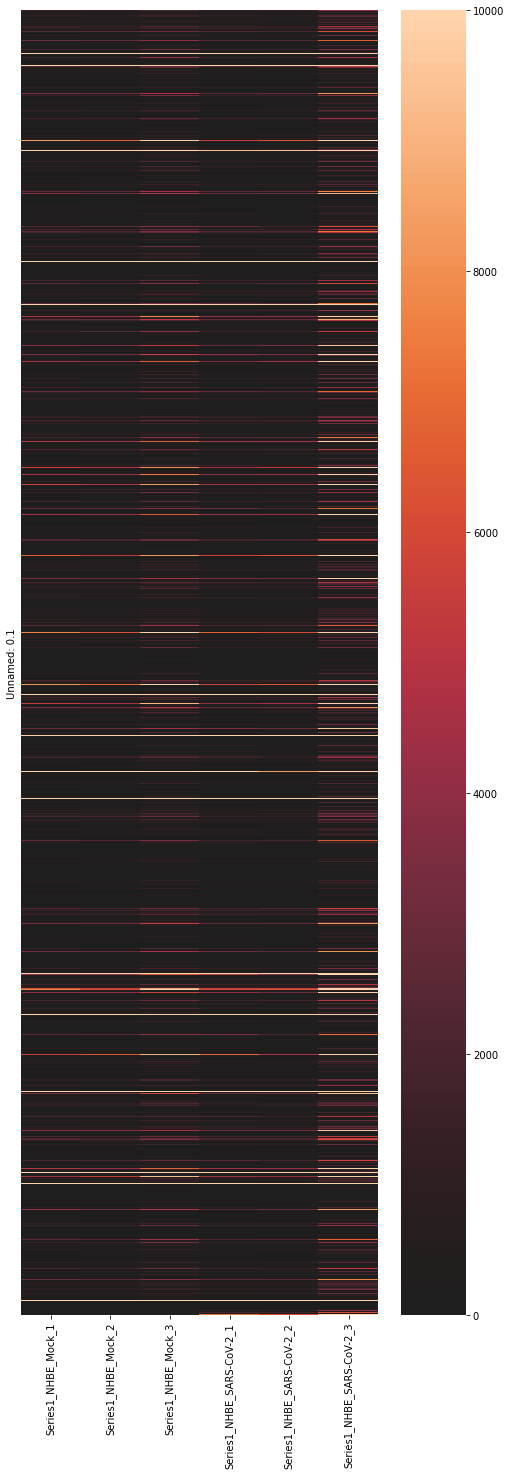

In [0]:
# heat map of dataframe
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 24)) 
sns.heatmap(viralAndHostGenesDf.iloc[-3000:, 1:], ax=ax, yticklabels=False, center=100, vmax=1e4) # , robust=True) # center=10000)

### Cool. Quick note, we need to TPM correct after adding the SARS-CoV2 genes because they add thousands of reads to the divisor. Actually, not sure if we need to normalize expression data because we are doing row-wise correlations. Will check the paper...

# Extract all of the relevant genes from TenOever host genes to filter the full STRING database. We will write a subset of the STRING network that only includes our NHBE expressed genes. Then, we can add the Virus-Host PPI interactions from Krogan.

In [0]:
# With this gene set, let's get all STRING network edges with our genes as the nodes to build our network
# NOTE: We will need to decide on a network edge cutoff; we used 800 before but this was arbitrary...
os.chdir("/content/drive/My Drive/BME-230B/")
# os.chdir("/content/drive/My Drive/BME230B/Final_Project")

# FILE = 'biopsyGeneSubsetDF.csv'
FILE = 'nhbeExpressionDF.csv'
OUT='nhbeGenes.txt'
MOUT = 'stringGeneNameMapper.txt'
CONNECT_OUT = 'nhbeGeneNetwork.txt'

def writeGeneFile(gnl):
    with open(OUT, 'w') as gnf:
        for g in gnl:   
            gnf.write(g+', ')

def writeMapperFile(gimDict):
    with open(MOUT, 'w') as gmf:
        for g in gimDict.items():   
            gmf.write(g[0]+', '+g[1]+'\n')

def writeLinksFile(cs):
    with open(CONNECT_OUT, 'w') as cof:
        for line in cs:
            cof.write(line)

def main():
    geneList = list() # Gene names from the network we want
    geneIdMapper = dict() # ID as key, common name as value
    connectionSet = list()
    header=False
    with open(FILE) as f, gzip.open(STRING_NAME_MAP, 'rt') as si, gzip.open(STRING_FULL_NETWORK, 'rt') as sd:
        for line in f.readlines():
            if not header:
                print(line)
                header = True
            else:
                smore = line.strip().split(',')
                geneList.append(smore[1])

        header = False
        for line in si.readlines():
            if not header:
                print(line)
                header = True
            else:
                infoRecord = line.strip().split()
                if infoRecord[1] in geneList:
                    geneIdMapper[infoRecord[0]] = infoRecord[1]

        header = False
        idList = list(geneIdMapper.keys())
        for line in sd.readlines():
            if not header:
                print(line)
                header = True
            else:
                dataRecord = line.strip().split()
                if dataRecord[0] in idList and dataRecord[1] in idList:
                    connectionSet.append(line)          

    print(geneIdMapper.items())

    # These are done, no need to re-write...
    
    # writeGeneFile(geneList)
    # writeMapperFile(geneIdMapper)
    # writeLinksFile(connectionSet)

main()

,Unnamed: 0,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3

protein_external_id	preferred_name	protein_size	annotation

dict_items([('9606.ENSP00000000233', 'ARF5'), ('9606.ENSP00000000412', 'M6PR'), ('9606.ENSP00000001008', 'FKBP4'), ('9606.ENSP00000001146', 'CYP26B1'), ('9606.ENSP00000002125', 'NDUFAF7'), ('9606.ENSP00000002165', 'FUCA2'), ('9606.ENSP00000002596', 'HS3ST1'), ('9606.ENSP00000002829', 'SEMA3F'), ('9606.ENSP00000003084', 'CFTR'), ('9606.ENSP00000003100', 'CYP51A1'), ('9606.ENSP00000003302', 'USP28'), ('9606.ENSP00000004531', 'SLC7A2'), ('9606.ENSP00000005178', 'PDK4'), ('9606.ENSP00000005257', 'RALA'), ('9606.ENSP00000005260', 'BAIAP2L1'), ('9606.ENSP00000005286', 'TMEM132A'), ('9606.ENSP00000005340', 'DVL2'), ('9606.ENSP00000005386', 'RPAP3'), ('9606.ENSP00000005587', 'SKAP2'), ('9606.ENSP00000005995', 'PRSS21'), ('9606.ENSP00000006015', 'HOXA11'), ('9606.ENSP00000006053', 'CX3CL

In [0]:
# Strength of evidence determines the edge weights in STRING network; we can filter based on a cutoff like this
!CUTOFF=800
!echo $CUTOFF
!cat nhbeGeneNetwork.txt | awk '{if($3+0 >= $CUTOFF){print}}' > nhbeGeneNetworkFilter$CUTOFF.txt

In [0]:
# Now we will add the Covid-Host edges to our STRING network using the Krogan data
geneIdMapper = dict()
with open(GENE_NAME_MAPPER) as gnm:
    for line in gnm.readlines():
        record = line.strip().split(', ')
        geneIdMapper[record[0]] = record[1]
revGeneIdMapper = {val: key for key, val in geneIdMapper.items()}

# lets first get our data frames - the 
viralAndHostGenesDf = pd.read_csv('viralAndHostGenesDf.csv')
viralAndHostGenesDf.head()

# We should only use genes that we have expression data for, so there will probably be a subset of the 332 that Krogan found
expressedPpiGenes = ppi_cov2_data['PreyGene'].isin(viralAndHostGenesDf['Unnamed: 0'])
print("ppi_cov2_data", len(ppi_cov2_data), "expressedPpiGenes", len(expressedPpiGenes))

with open(EXPR_PPI_NETWORK, 'a') as epn:
    for index, row in ppi_cov2_data.iterrows():
        covGene = row['Bait'].split()[-1]
        epn.write('{0} {1} {2}\n'.format(covGene, row['PreyGene'], float(row['MIST'])*1e3))

! head nhbeGeneNetworkCov.txt
! tail nhbeGeneNetworkCov.txt

ppi_cov2_data 332 expressedPpiGenes 332
nsp13 HOOK1 994.048081
orf9b MARK2 994.04114
nsp1 PRIM2 993.975192
nsp13 TBK1 993.970596
orf9b MARK3 993.959488
orf9b MARK1 993.95635
M ANO6 993.9044190000001
orf9b SLC9A3R1 993.764827
nsp5 HDAC2 993.708403
nsp12 ZNF318 993.695111
orf8 FKBP10 660.192254
orf10 ELOB 655.233005
orf9c PIGS 647.089409
orf10 RBX1 639.21796
nsp8 MRPS5 636.37328
N RPL36 631.167513
N RBM28 628.043125
orf10 ELOC 618.948613
N DDX21 613.544528
nsp8 MRPS27 602.806863


In [0]:
viralAndHostGenesDf = pd.read_csv(EXPRESSION_ALL_GENES, index_col='Unnamed: 0.1')
viralAndHostGenesDf = viralAndHostGenesDf.drop(columns=['Unnamed: 0'])
viralAndHostGenesDf.head()
# viralAndHostGenesDf.loc['HOOK1', :]
# viralAndHostGenesDf.columns

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
Unnamed: 0.1,,,,,,
WASH7P,29,24,23,34,19,44
LOC729737,112,119,113,127,84,270
LOC100133331,19,21,36,16,23,54
LOC100288069,13,17,27,19,9,50
LINC00115,9,12,26,12,7,28


In [0]:
viralAndHostGenesDf = pd.read_csv(EXPRESSION_ALL_GENES)
viralAndHostGenesDf.set_index('Unnamed: 0.1', inplace=True, drop=True)
viralAndHostGenesDf.head()

,Unnamed: 0,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
Unnamed: 0.1,,,,,,,
WASH7P,0,29,24,23,34,19,44
LOC729737,1,112,119,113,127,84,270
LOC100133331,2,19,21,36,16,23,54
LOC100288069,3,13,17,27,19,9,50
LINC00115,4,9,12,26,12,7,28


# Now we have the starting components of the Xia Figure 1 workflow. The next step is to create the NP network from our full network. NP network is a subset of nodes and edges whose expression data is highly correlated or inversely correlated above some cutoff. We abs(PCC) >= 0.8 as the cutoff.

In [0]:
# To get the NP network, we will remove all network edges whose pairwise Pearson Correlation Coefficient (PCC) is between -0.4 and 0.4, ie, edges with weak PCC.
CUTOFF = 0.8
# viralAndHostGenesDf = pd.read_csv(EXPRESSION_ALL_GENES)
# viralAndHostGenesDf.set_index('Unnamed: 0.1', inplace=True, drop=True)
viralAndHostGenesDf = pd.read_csv(EXPRESSION_ALL_GENES, index_col='Unnamed: 0.1')
viralAndHostGenesDf = viralAndHostGenesDf.drop(columns=['Unnamed: 0'])
print(viralAndHostGenesDf.head)
print(viralAndHostGenesDf.index[:20])

npEdges = list()
# with open('nhbeCovTest.txt') as epn, open(NP_NETWORK[:-4]+str(CUTOFF)+'.txt', 'a') as npn:
# with open('nhbeCovTest.txt') as epn, open('npTest.txt', 'w') as npn:
with open(EXPR_PPI_NETWORK) as epn, open(NP_NETWORK[:-4]+str(CUTOFF)+'.txt', 'w') as npn:
    for line in epn.readlines():
        record = line.strip().split()
        if geneIdMapper.get(record[0]):
            src = geneIdMapper[record[0]]
        else:
            if record[0] not in ['orf9c', 'orf10', 'nsp11']:
                src = conversion_dict[record[0]]
        if geneIdMapper.get(record[1]):
            snk = geneIdMapper[record[1]]
        else:
            snk = record[1]
        try:
            corr = scipy.stats.pearsonr(viralAndHostGenesDf.loc[src], viralAndHostGenesDf.loc[snk])
        except:
            continue
        # print(corr)
        if abs(corr[0]) >= CUTOFF:
            npn.write(line)

<bound method NDFrame.head of               Series1_NHBE_Mock_1  ...  Series1_NHBE_SARS-CoV-2_3
Unnamed: 0.1                       ...                           
WASH7P                         29  ...                         44
LOC729737                     112  ...                        270
LOC100133331                   19  ...                         54
LOC100288069                   13  ...                         50
LINC00115                       9  ...                         28
...                           ...  ...                        ...
ns7b                            1  ...                         37
ns8                            13  ...                        960
ORF-9b                         24  ...                       5996
ORF14                           8  ...                       2553
NC                             79  ...                      22635

[16386 rows x 6 columns]>
Index(['WASH7P', 'LOC729737', 'LOC100133331', 'LOC100288069', 'LINC00115',
       'FA

In [0]:
# !tail -332 nhbeGeneNetworkCov.txt > nhbeCovTest.txt
!tail -332 npNhbeGeneNetworkCov0.4.txt
# !diff npNhbeGeneNetworkCov.txt npNhbeGeneNetworkCov0.4.txt

9606.ENSP00000266304 9606.ENSP00000380283 177
9606.ENSP00000266304 9606.ENSP00000324856 162
9606.ENSP00000266304 9606.ENSP00000305918 257
9606.ENSP00000266304 9606.ENSP00000369050 258
9606.ENSP00000266304 9606.ENSP00000433560 194
9606.ENSP00000266304 9606.ENSP00000219782 176
9606.ENSP00000266304 9606.ENSP00000374529 265
9606.ENSP00000266304 9606.ENSP00000323588 202
9606.ENSP00000266304 9606.ENSP00000247706 157
9606.ENSP00000266304 9606.ENSP00000407586 240
9606.ENSP00000266304 9606.ENSP00000216115 284
9606.ENSP00000266304 9606.ENSP00000293771 161
9606.ENSP00000266304 9606.ENSP00000484060 183
9606.ENSP00000266304 9606.ENSP00000312273 175
9606.ENSP00000266304 9606.ENSP00000250244 197
9606.ENSP00000266304 9606.ENSP00000362688 182
9606.ENSP00000266304 9606.ENSP00000302194 151
9606.ENSP00000266304 9606.ENSP00000478767 156
9606.ENSP00000266304 9606.ENSP00000266503 508
9606.ENSP00000266304 9606.ENSP00000263253 196
9606.ENSP00000266304 9606.ENSP00000263974 204
9606.ENSP00000266304 9606.ENSP0000

In [0]:
# Then we run hierarchical clustering on this network to get a sense of virus-host module interactions caused by SARS-CoV2 transcripts & proteins

# https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

NP_network_df = pd.read_csv(NP_NETWORK, header=None, sep = ' ')
NP_network_df.columns = ['Source', 'Sink', 'Score']
NP_network_df.tail(340)

,Source,Sink,Score
1474550,9606.ENSP00000266304,9606.ENSP00000263795,293
1474551,9606.ENSP00000266304,9606.ENSP00000382800,371
1474552,9606.ENSP00000266304,9606.ENSP00000445905,233
1474553,9606.ENSP00000266304,9606.ENSP00000356205,158
1474554,9606.ENSP00000266304,9606.ENSP00000020673,161
...,...,...,...
1474885,9606.ENSP00000266304,9606.ENSP00000341171,279
1474886,9606.ENSP00000266304,9606.ENSP00000271452,210
1474887,9606.ENSP00000266304,9606.ENSP00000358880,196
1474888,9606.ENSP00000266304,9606.ENSP00000175756,248


### **We Are Now Gonna Cluster Using sns.Clustermap**
Using the NP network data - now we will apply hierarchal clustering on the data.

In [0]:
from seaborn import clustermap

# filename: npNhbeGeneNetworkCov0.4.txt
# filename:

# get edge matrix
NP_EDGE_FILE = 'npNhbeGeneNetworkCov0.8-600.txt'
np_network_df = pd.read_csv(NP_EDGE_FILE, header=None, sep = ' ')
np_network_df.columns = ['source', 'sink', 'score']
np_network_df.head()

,source,sink,score
0,9606.ENSP00000000233,9606.ENSP00000418915,606.0
1,9606.ENSP00000000233,9606.ENSP00000432568,909.0
2,9606.ENSP00000000233,9606.ENSP00000427900,910.0
3,9606.ENSP00000000233,9606.ENSP00000350199,751.0
4,9606.ENSP00000000233,9606.ENSP00000438085,614.0


In [0]:
# get mapper table

gene_mapper_df = pd.read_csv(GENE_NAME_MAPPER, header=None, delimiter=', ')
gene_mapper_df.columns = ['STRING', 'Name']
print(gene_mapper_df.iloc[3, 1])
gene_mapper_df.tail()

CYP26B1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,STRING,Name
14808,9606.ENSP00000485526,RASSF10
14809,9606.ENSP00000485561,C17orf100
14810,9606.ENSP00000485582,CERS1
14811,9606.ENSP00000485614,ZNF518A
14812,9606.ENSP00000485663,EIF3L


In [0]:
# now getting rid of STRING names
edge_matrix = np.array(np_network_df[['source', 'sink']])
gene_name_matrix = np.array(gene_mapper_df)
print(edge_matrix.shape)
print(gene_name_matrix.shape)


for position in range(np_network_df.shape[0]):

    # get the source and sink
    source = edge_matrix[position, 0]
    sink = edge_matrix[position, 1]
    try:
        # find each one's index
        # index_source = np.where(gene_name_matrix[:,0] == source)[0][0]
        # index_sink = np.where(gene_name_matrix[:,0] == sink)[0][0]
        index_source = np.argwhere(gene_name_matrix[:,0] == source)[0][0]
        index_sink = np.argwhere(gene_name_matrix[:,0] == sink)[0][0]

        # now replace item in edge_matrix
        edge_matrix[position, 0] = gene_name_matrix[index_source ,1]
        edge_matrix[position, 1] = gene_name_matrix[index_sink, 1]
    except:
        continue
    

print(edge_matrix[:30, :])

(594884, 2)
(14813, 2)
[['ARF5' 'CDKN2A']
 ['ARF5' 'SPTBN2']
 ['ARF5' 'KIF13B']
 ['ARF5' 'AP1B1']
 ['ARF5' 'GGA3']
 ['ARF5' 'KIF21A']
 ['ARF5' 'ARFGAP1']
 ['ARF5' 'ANK2']
 ['ARF5' 'KLC1']
 ['ARF5' 'COPZ2']
 ['ARF5' 'KIF15']
 ['ARF5' 'DCTN5']
 ['ARF5' 'KIF16B']
 ['ARF5' 'KDELR2']
 ['ARF5' 'RAB1B']
 ['ARF5' 'SND1']
 ['ARF5' 'TMED10']
 ['ARF5' 'KIF3B']
 ['ARF5' 'RACGAP1']
 ['ARF5' 'GBF1']
 ['ARF5' 'DYNC1I2']
 ['ARF5' 'CYTH3']
 ['ARF5' 'CAPZB']
 ['ARF5' 'RAB11FIP3']
 ['ARF5' 'C2CD4B']
 ['ARF5' 'ACAP2']
 ['ARF5' 'KIF3C']
 ['ARF5' 'IQSEC2']
 ['ARF5' 'DYNC1LI1']
 ['ARF5' 'KIFAP3']]


In [0]:
# reset the data frame
print(edge_matrix.shape)
np_network_df['source'] = edge_matrix[:, 0]
np_network_df['sink'] = edge_matrix[:, 1]

np_network_df.head(300000)

(594884, 2)


,source,sink,score
0,ARF5,CDKN2A,606.0
1,ARF5,SPTBN2,909.0
2,ARF5,KIF13B,910.0
3,ARF5,AP1B1,751.0
4,ARF5,GGA3,614.0
...,...,...,...
299995,PES1,RPL6,954.0
299996,ZNF589,TRIM28,920.0
299997,ACAP3,PUSL1,673.0
299998,SND1,DICER1,746.0


In [0]:
# save this guy
np_network_df.to_csv('Np_edge_network_names_0.8_600.txt')

### **We are now filtering the EXPRESSION_ALL_GENES dataframe**
The purpose of doing is to know which genes have high or inversely high correlation.

In [0]:
# filter da boi
viralAndHostGenesDf = pd.read_csv(EXPRESSION_ALL_GENES, index_col='Unnamed: 0')
viralAndHostGenesDf = viralAndHostGenesDf.rename(columns={'Unnamed: 0.1':'Gene_Name'})
# viralAndHostGenesDf = viralAndHostGenesDf.drop(columns=['Unnamed: 0'])
viralAndHostGenesDf.head()

,Gene_Name,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
0,WASH7P,29,24,23,34,19,44
1,LOC729737,112,119,113,127,84,270
2,LOC100133331,19,21,36,16,23,54
3,LOC100288069,13,17,27,19,9,50
4,LINC00115,9,12,26,12,7,28


In [0]:
viralAndHostGenesDf.tail()

,Gene_Name,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
12671,ns6,7,3,11,143,126,517
12672,ORF7a,3,2,5,57,35,170
12673,ns8,13,6,29,328,304,960
12674,ORF-9b,24,5,34,1894,1619,5996
12675,NC,79,33,137,7340,6091,22635


In [0]:
# now we shall filter
set_of_genes = set(list(np_network_df['sink']) + list(np_network_df['source']) + list(conversion_dict.values()))

print(len(set_of_genes))
print(viralAndHostGenesDf.shape[0])

viralAndHostGenesDf = viralAndHostGenesDf[viralAndHostGenesDf['Gene_Name'].isin(set_of_genes)]
# viralAndHostGenesDf = viralAndHostGenesDf.drop(~viralAndHostGenesDf['Gene_Name'].isin(set_of_genes))
# gene_list = np.array(viralAndHostGenesDf['Gene_Name'])
# drop_list = [position for position in range(viralAndHostGenesDf.shape[0]) if gene_list[position] in set_of_genes]

print(viralAndHostGenesDf.shape[0])

print(set_of_genes.difference(set(viralAndHostGenesDf['Gene_Name'])))
viralAndHostGenesDf.head()

12693
16386
12676
{'orf3a', 'nsp12', 'orf9b', 'E', 'N', 'orf6', 'orf3b', 'nsp5', 'nsp11', 'nsp14', 'Spike', 'orf8', 'orf10', 'nsp13', 'M', 'orf7a', 'orf9c'}


,Gene_Name,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
6,SAMD11,11,20,8,26,10,63
7,NOC2L,1773,1757,2554,1915,1605,5162
8,KLHL17,110,133,131,168,78,242
9,PLEKHN1,170,172,254,186,120,403
10,HES4,26,52,57,30,17,64


In [0]:
# save the file
viralAndHostGenesDf.to_csv('salmon_with_elotes_NP_network_data.txt')

## We will now Seaborn cluster this stuff 


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


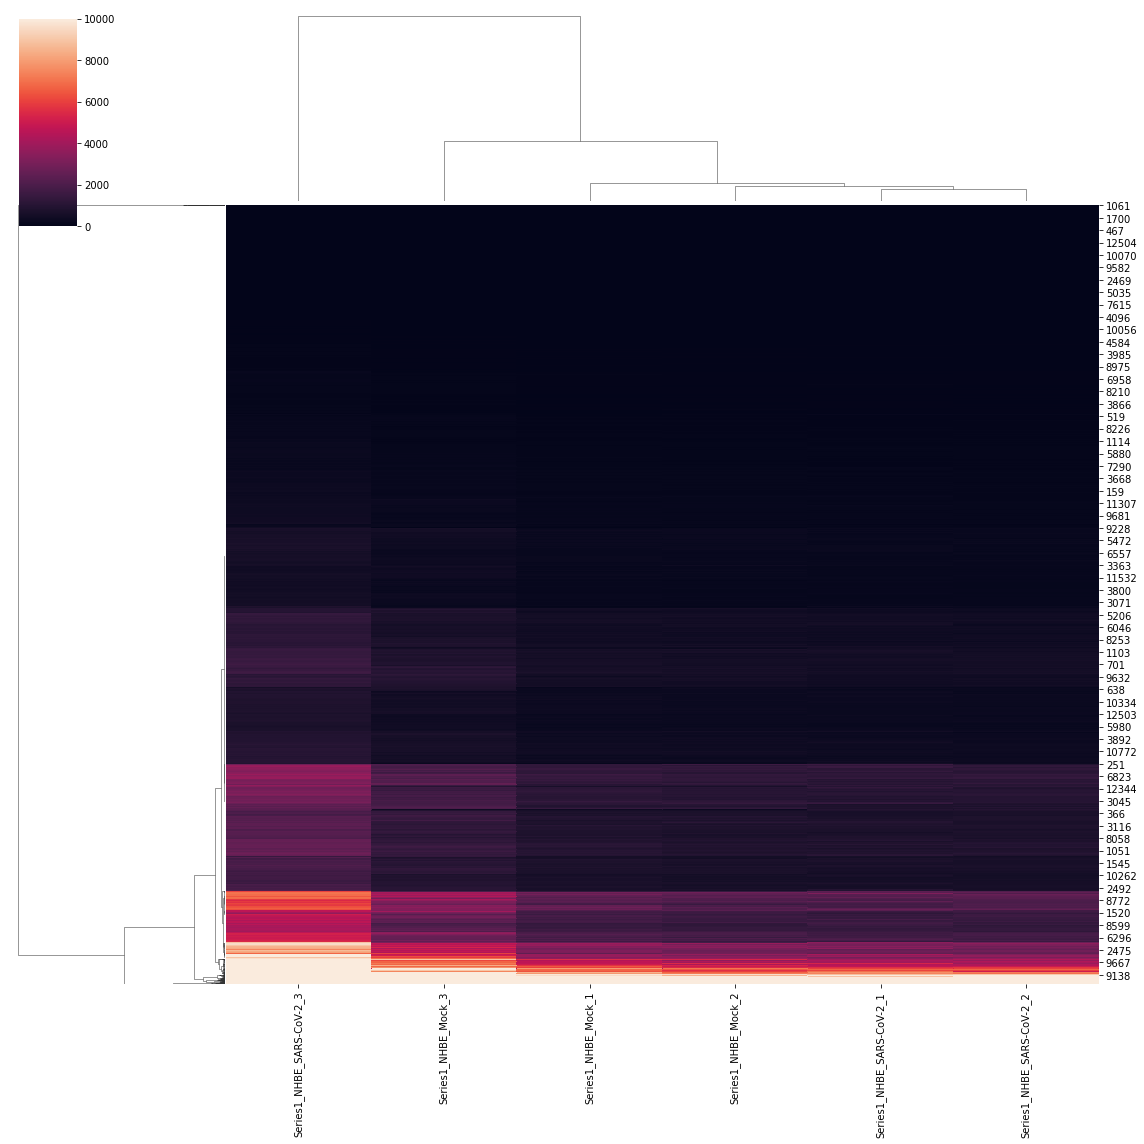

In [0]:
viralAndHostGenesDf = pd.read_csv('salmon_with_elotes_NP_network_data.txt')
viralAndHostGenesDf = viralAndHostGenesDf.drop(columns=['Unnamed: 0'])

from seaborn import clustermap

cg_NP_network = clustermap(viralAndHostGenesDf.iloc[:, 1:], vmax=1e4, figsize=(16, 16))


In [0]:
hot_bois = cg_NP_network.dendrogram_row.reordered_ind[-3000:]

subset_viralAndHostGenesDf = viralAndHostGenesDf.iloc[hot_bois, :]

subset_viralAndHostGenesDf.head()

,Gene_Name,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
9353,ELOVL6,924,923,1697,868,937,2887
7040,STARD7,1095,924,1643,758,859,2912
9978,TTC1,1141,896,1710,853,940,2960
10443,CDC5L,1175,921,1720,867,1020,2976
12562,OCRL,1111,924,1668,848,1009,2961


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


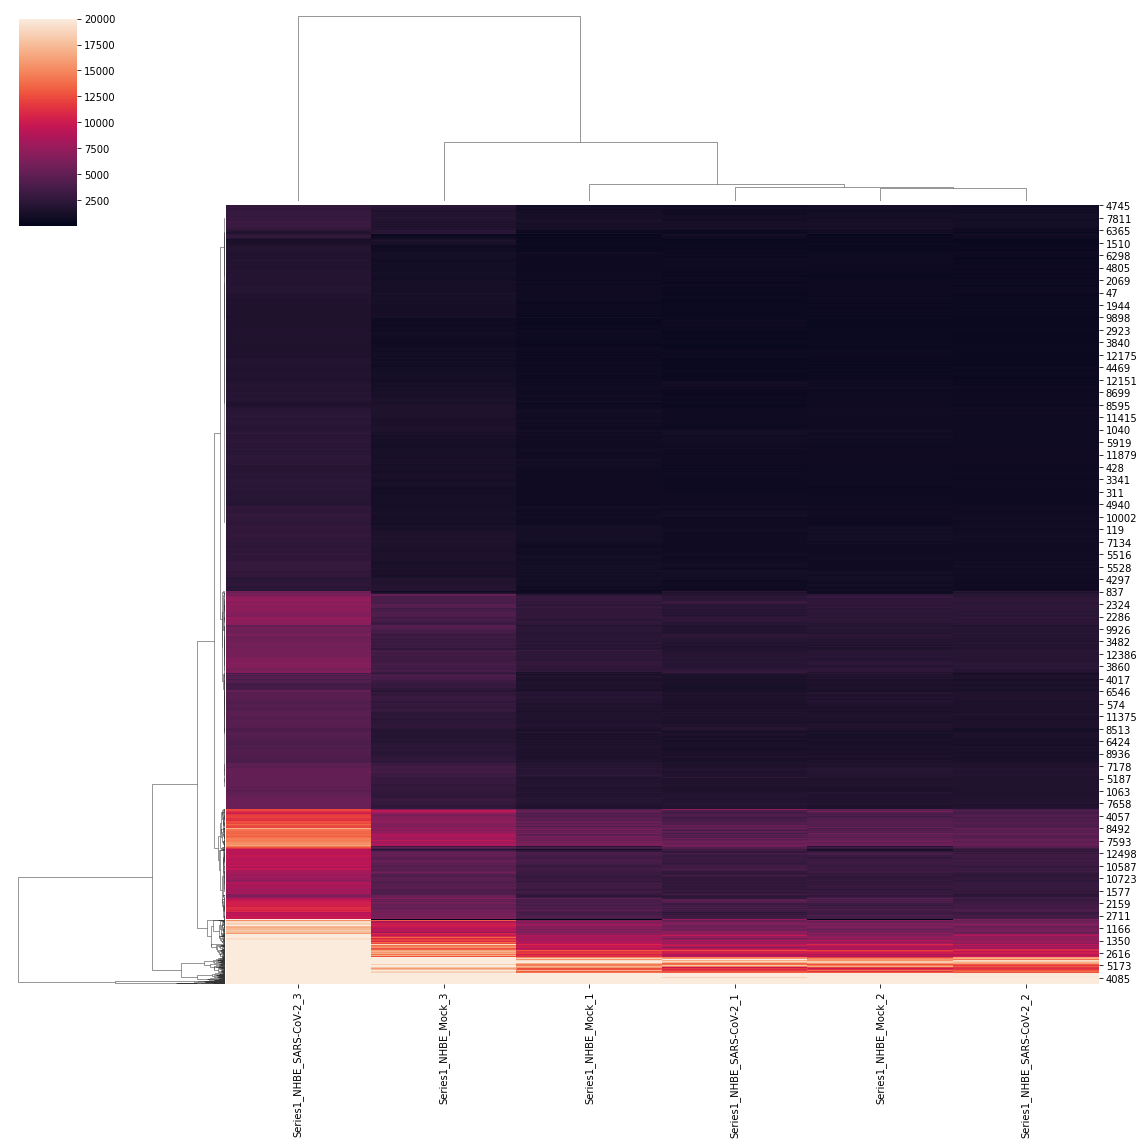

In [0]:
from seaborn import clustermap

cg_NP_network_sub = clustermap(subset_viralAndHostGenesDf.iloc[:, 1:], vmax=2e4, figsize=(16, 16))


In [0]:
print(max(cg_NP_network_sub.dendrogram_row.reordered_ind))
subset_viralAndHostGenesDf = subset_viralAndHostGenesDf.reset_index(drop=True)
subset_viralAndHostGenesDf.tail()

2999


,Gene_Name,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
2995,EEF1A1,61064,47893,74720,52085,55234,158236
2996,ANXA2,67164,54398,85563,59454,60349,196668
2997,FTH1,64156,64403,97106,58676,58860,176984
2998,GAPDH,72716,64055,97410,65758,57945,189586
2999,KRT6A,64852,61023,108942,70305,60166,194475


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


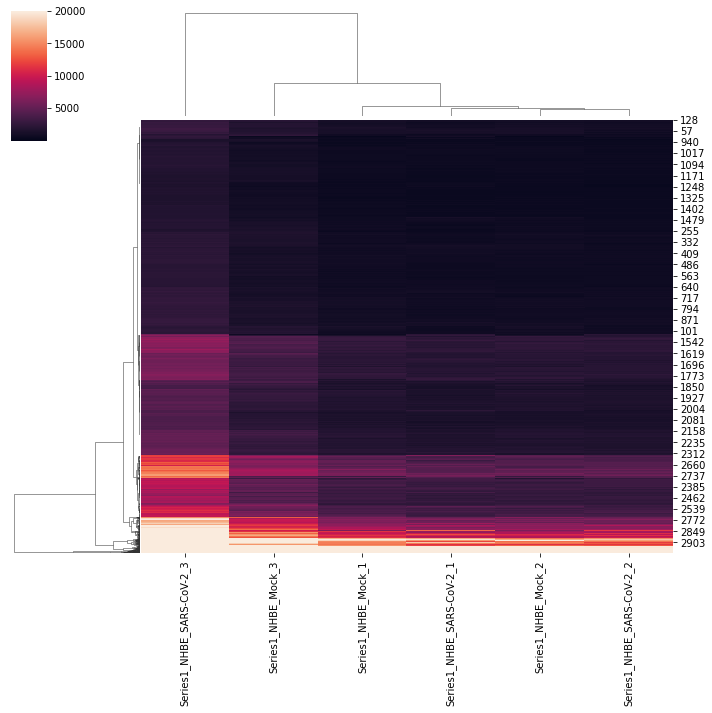

In [0]:
hot_bois_1 = cg_NP_network_sub.dendrogram_row.reordered_ind[-500:]

subset_subset_viralAndHostGenesDf = viralAndHostGenesDf.iloc[hot_bois_1, :]

cg_NP_network_sub_sub = clustermap(subset_viralAndHostGenesDf.iloc[:, 1:], vmax = 2e4)

In [0]:
hot_bois_full = cg_NP_network.dendrogram_row.reordered_ind
covide_set = set(list(conversion_dict.keys()) + list(conversion_dict.values()))
hot_sex = set(viralAndHostGenesDf.iloc[hot_bois_full, 0])


# print(covide_set)
# print(hot_sex)

covid_inter = covide_set.intersection(hot_sex)

# print(covid_inter)

covid_inter_1 = viralAndHostGenesDf.index[viralAndHostGenesDf['Gene_Name'].isin(covide_set)]

for item in list(covid_inter_1): # {'nsp4', 'nsp15', 'NC', 'ORF3a', 'nsp2', '3CL-PRO', 'ns6', 'E protein', 'ExoN', 'Hel', 'nsp6', 'nsp8', 'ORF-9b', 'ORF7a', 'M protein', 'nsp10', 'Pol', 'nsp9', 'ns8', 'nsp1', 'nsp7', 'S glycoprotein'}:
    try: 
        print(hot_bois_full.index(int(item)))
    except:
        continue

2704
2698
455
431
476
539
2262
15
13
2263
2710
2268
2701
6563
5253
165
9102
5250
2711
9092
11165
12274


In [0]:
viralAndHostGenesDf_1 = pd.read_csv('salmon_with_elotes_NP_network_data.txt')
viralAndHostGenesDf_1 = viralAndHostGenesDf_1.drop(columns=['Unnamed: 0'])
viralAndHostGenesDf_1 = viralAndHostGenesDf_1.set_index(viralAndHostGenesDf['Gene_Name'])
viralAndHostGenesDf_1 = viralAndHostGenesDf_1.drop(columns=['Gene_Name'])
print(viralAndHostGenesDf_1.loc['NC', :])
viralAndHostGenesDf_1.tail()

Series1_NHBE_Mock_1             79
Series1_NHBE_Mock_2             33
Series1_NHBE_Mock_3            137
Series1_NHBE_SARS-CoV-2_1     7340
Series1_NHBE_SARS-CoV-2_2     6091
Series1_NHBE_SARS-CoV-2_3    22635
Name: NC, dtype: int64


,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
Gene_Name,,,,,,
ns6,7,3,11,143,126,517
ORF7a,3,2,5,57,35,170
ns8,13,6,29,328,304,960
ORF-9b,24,5,34,1894,1619,5996
NC,79,33,137,7340,6091,22635


Make sure we reindex the data frame! To match the 0 to N matching on a clustematrix object.

In [0]:
# Try subclustering these genes:
# 9102, 9092
tallBoisLocs = cg_NP_network.dendrogram_row.reordered_ind[6500:11000]
tallBoisDf = viralAndHostGenesDf.iloc[tallBoisLocs, :]
tallBoisDf.reset_index(drop=True, inplace=True)
tallBoisDf.head()

# And these genes
# 6563, 5253, 5250
roundBoisLocs = cg_NP_network.dendrogram_row.reordered_ind[4000:6500]
roundBoisDf = viralAndHostGenesDf.iloc[roundBoisLocs, :]
roundBoisDf.reset_index(drop=True, inplace=True)
roundBoisDf.head()

# And lots more genes 
# 2704, 2698, 2262, 2263, 2710, 2268, 2701, 2711
smallBoisLocs = cg_NP_network.dendrogram_row.reordered_ind[1000:4000]
smallBoisDf = viralAndHostGenesDf.iloc[smallBoisLocs, :]
smallBoisDf.reset_index(drop=True, inplace=True)
smallBoisDf.head()


# And the last cluster of CoV2 genes:
# 165, 455, 431, 476, 539, 15, 13
babyBoisLocs = cg_NP_network.dendrogram_row.reordered_ind[0:1000]
babyBoisDf = viralAndHostGenesDf.iloc[babyBoisLocs, :]
babyBoisDf.reset_index(drop=True, inplace=True)
babyBoisDf.head()

,Gene_Name,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
0,LAMC2,80535,67531,123576,82264,84861,255564
1,FN1,116591,89174,145310,109630,110055,319276
2,S100A2,110891,95115,164736,86877,91154,254218
3,KRT5,118577,111764,170196,95676,91694,275112
4,PRRT2,2,10,2,2,4,6


# We can try different sub-cluster sizes to see how well CoV genes associate with host genes, then infer some kind of interactions. 

## Generally, decreasing the cluster distance metric increases the # of clusters and vice-versa.

In [0]:
# Make a convenient sub-clustering function:
covide_set = set(list(conversion_dict.keys()) + list(conversion_dict.values()))

def subCluster(df, clusterMap, numClusters, dist, dispClust=0):
    # cited from https://stackoverflow.com/questions/56526707/extract-rows-of-clusters-in-hierarchical-clustering-using-seaborn-clustermap
    # used as inspiration for developing subcluster function. 

    df = df.set_index(df['Gene_Name'])
    df = df.drop(columns=['Gene_Name'])
    clusters = hierarchy.fcluster(Z= clusterMap.dendrogram_row.linkage, t=dist, criterion='distance')

    # print(clusters)

    clusterDict = {key:[] for key in range(numClusters)}
    for i, cluster in enumerate(clusters):
        clusterDict[cluster].append(df.index[i])

    covInSet = list()
    for i in clusterDict.keys():
        if len(clusterDict[i]):
            print(i, len(clusterDict[i]))
        for gene in clusterDict[i]:
            if gene in covide_set: 
                covInSet.append((i, gene, len(clusterDict[i])))

    print(covInSet)
    if dispClust:
        for i in dispClust:
            print("Cluster {0}".format(i), clusterDict[i])

    return clusterDict

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


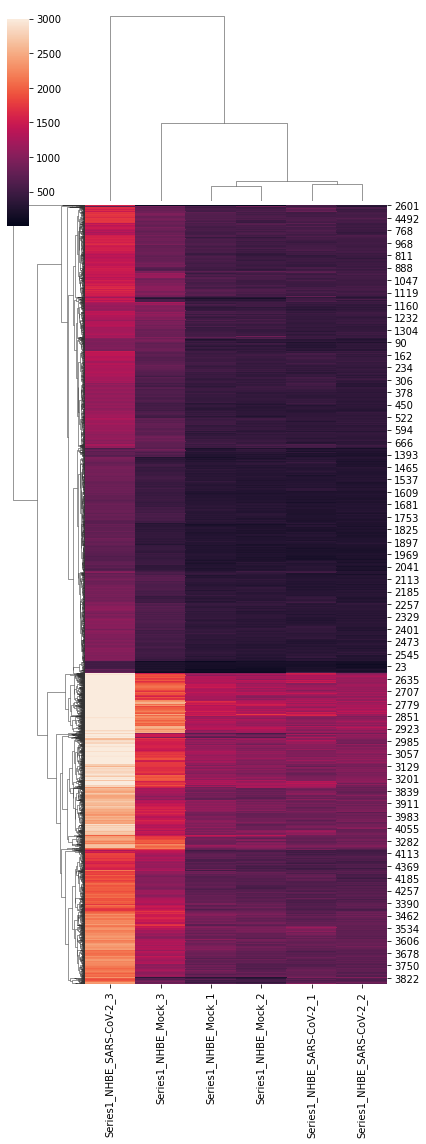

In [0]:
tallBoisClustMap = clustermap(tallBoisDf.iloc[:, 1:], vmax=3e3, figsize=(6, 16))

In [0]:
tall_cluster_dict = subCluster(tallBoisDf, tallBoisClustMap, 100, 550)

1 1
2 1
3 8
4 2
5 1
6 1390
7 1301
8 6
9 5
10 149
11 81
12 6
13 2
14 96
15 1
16 3
17 3
18 4
19 10
20 1
21 2
22 7
23 286
24 2
25 272
26 5
27 46
28 23
29 11
30 1
31 22
32 335
33 382
34 4
35 31
[(2, 'M protein', 1), (3, 'S glycoprotein', 8), (7, 'ns8', 1301)]


In [0]:
tall_cluster_dict = subCluster(tallBoisDf, tallBoisClustMap, 100, 500, (2, 3, 10))

1 1
2 1
3 4
4 4
5 2
6 1
7 520
8 870
9 1234
10 67
11 6
12 5
13 149
14 31
15 50
16 6
17 2
18 60
19 36
20 1
21 3
22 3
23 4
24 10
25 1
26 1
27 1
28 3
29 4
30 248
31 27
32 11
33 2
34 270
35 1
36 1
37 5
38 46
39 3
40 20
41 6
42 3
43 2
44 1
45 22
46 335
47 382
48 4
49 23
50 8
[(2, 'M protein', 1), (3, 'S glycoprotein', 4), (10, 'ns8', 67)]
Cluster 2 ['M protein']
Cluster 3 ['CCL20', 'S glycoprotein', 'SPRR2D', 'IFI27']
Cluster 10 ['PSMB8', 'EMC8', 'TRIM16L', 'STK11IP', 'MRPL2', 'KLK8', 'SWI5', 'FAM160A2', 'RASSF1', 'USP20', 'LHPP', 'CAPN3', 'C11orf80', 'FUT8', 'RIN3', 'PLEKHJ1', 'UBIAD1', 'PGP', 'MRGBP', 'AIP', 'ZBTB2', 'FGD1', 'TJAP1', 'SDR39U1', 'SURF2', 'GMPPB', 'IGHMBP2', 'UBE2S', 'TMEM150A', 'PRKAR1B', 'RAPGEF3', 'KRBA1', 'TECPR1', 'TRAF2', 'KLHL22', 'SSNA1', 'NDRG4', 'HYAL3', 'BIRC3', 'EDN1', 'IFI44', 'IFIH1', 'NRG1', 'ALKBH6', 'PNPLA3', 'ADAM8', 'HELZ2', 'IFIT1', 'SOCS3', 'HEPHL1', 'PDGFB', 'OAS1', 'IRAK2', 'SAMHD1', 'EREG', 'SAMD9L', 'SPRR1A', 'SPRY4', 'BMP2', 'PRDM1', 'GABRP', 'MICB'

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


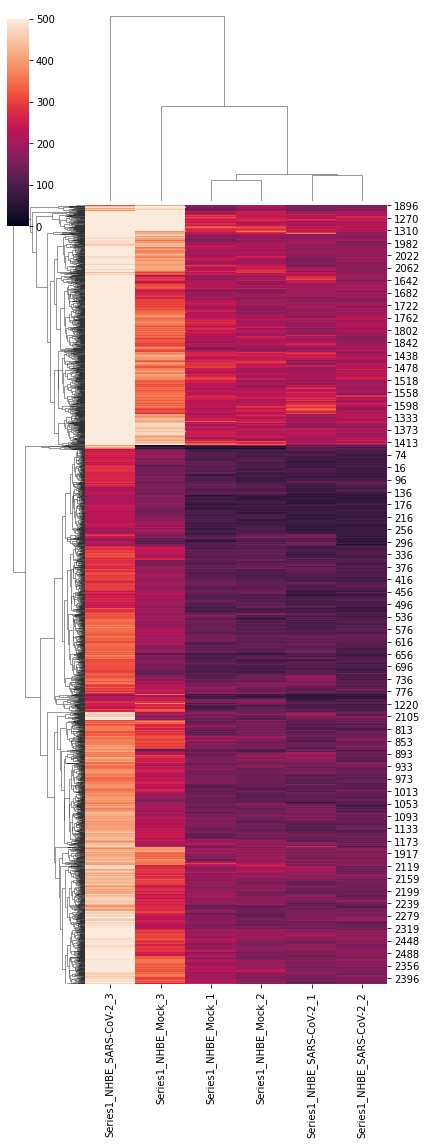

In [0]:
roundBoisClustMap = clustermap(roundBoisDf.iloc[:, 1:], vmax=500, figsize=(6, 16))

In [0]:
roundBoisClustMap.savefig('round_bois_heatmap.png')

In [0]:
subCluster(roundBoisDf, roundBoisClustMap, 100, 300, (2, 6))

1 644
2 12
3 1906
4 72
5 358
6 4
7 2
8 1
9 1
[(2, 'ns6', 12), (2, 'ORF3a', 12), (6, 'S glycoprotein', 4)]
Cluster 2 ['SNX22', 'IFI44L', 'CXCL3', 'ns6', 'PDZK1IP1', 'CXCL5', 'ORF3a', 'CRCT1', 'IFITM1', 'IL6', 'PGLYRP4', 'XAF1']
Cluster 6 ['CCL20', 'S glycoprotein', 'SPRR2D', 'IFI27']


In [0]:
dict_clust = subCluster(roundBoisDf, roundBoisClustMap, 100, 350)

1 772
2 1728
[(2, 'ns6', 1728), (2, 'ORF3a', 1728)]


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


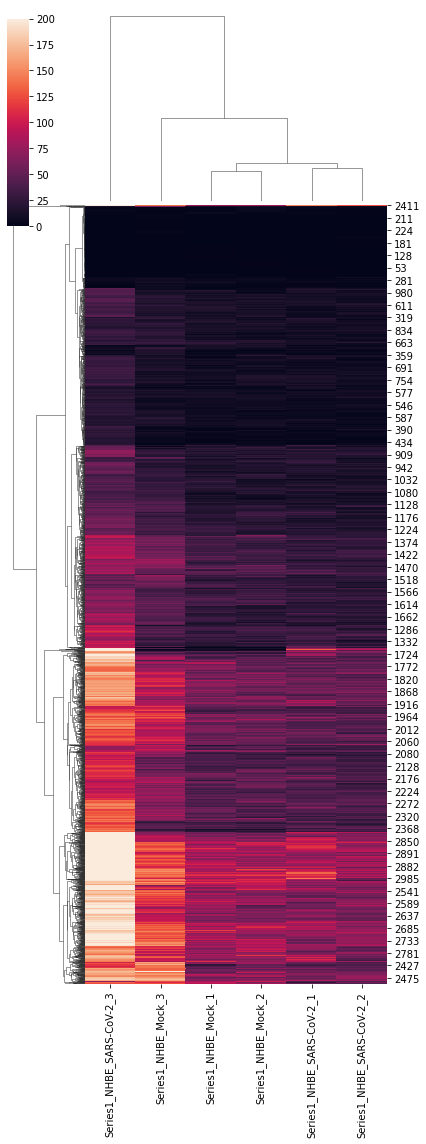

In [0]:
smallBoisClustMap = clustermap(smallBoisDf.iloc[:, 1:], vmax=2e2, figsize=(6, 16))

In [0]:
subCluster(smallBoisDf, smallBoisClustMap, 100, 100, (3,))
subCluster(smallBoisDf, smallBoisClustMap, 300, 30, (3,))

1 6
2 1702
3 10
4 699
5 583
[(2, 'nsp8', 1702), (2, 'Pol', 1702), (2, 'ExoN', 1702), (2, 'nsp2', 1702), (2, 'nsp15', 1702), (3, 'nsp1', 10), (3, 'Hel', 10), (3, 'ORF7a', 10)]
Cluster 3 ['nsp1', 'BCL2A1', 'MYEOV', 'PI3', 'MX2', 'CSF3', 'Hel', 'ORF7a', 'SPRR2E', 'CSF2']
1 1
2 1
3 1
4 1
5 1
6 1
7 315
8 604
9 1
10 2
11 43
12 303
13 9
14 106
15 35
16 4
17 50
18 141
19 1
20 40
21 39
22 1
23 3
24 3
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 2
33 2
34 1
35 2
36 4
37 2
38 2
39 1
40 2
41 1
42 1
43 1
44 2
45 1
46 3
47 4
48 10
49 1
50 5
51 1
52 1
53 1
54 5
55 2
56 8
57 23
58 6
59 2
60 14
61 34
62 21
63 13
64 2
65 13
66 1
67 2
68 1
69 2
70 3
71 17
72 11
73 6
74 12
75 1
76 6
77 6
78 6
79 5
80 7
81 27
82 11
83 10
84 11
85 24
86 1
87 1
88 1
89 1
90 1
91 1
92 5
93 15
94 2
95 2
96 1
97 1
98 1
99 1
100 18
101 48
102 11
103 20
104 11
105 11
106 63
107 1
108 13
109 24
110 26
111 9
112 4
113 2
114 5
115 2
116 4
117 8
118 11
119 5
120 1
121 4
122 7
123 2
124 1
125 1
126 2
127 7
128 1
129 3
130 1
131 7
132 1
133 5

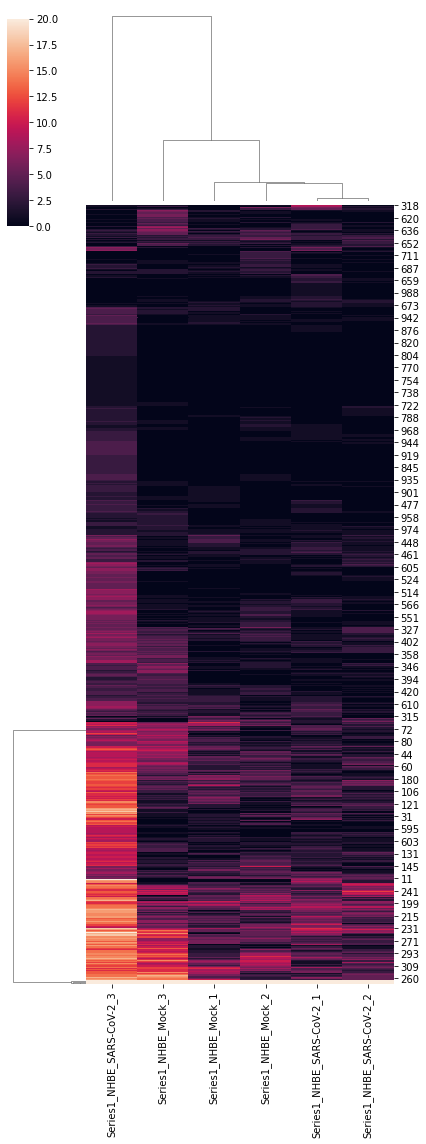

In [0]:
babyBoisClustMap = clustermap(babyBoisDf.iloc[:, 1:], vmax=20, figsize=(6, 16))

In [0]:
subCluster(babyBoisDf, babyBoisClustMap, 100, 8)

1 664
2 6
3 196
4 5
5 15
6 43
7 5
8 2
9 1
10 42
11 17
12 1
13 1
14 1
15 1
[(1, '3CL-PRO', 664), (1, 'nsp4', 664), (1, 'nsp6', 664), (1, 'nsp7', 664), (3, 'E protein', 196), (4, 'nsp10', 5), (4, 'nsp9', 5)]


In [0]:
# subset edges of NP network + find the legnth that gets you only 3 clusters. 

In [0]:
# reduce until we have 3 clusters
round_cluster_dict = subCluster(roundBoisDf, roundBoisClustMap, 100, 250, (4,5))

1 20
2 751
3 1
4 12
5 1716
[(4, 'ns6', 12), (4, 'ORF3a', 12)]
Cluster 4 ['SNX22', 'IFI44L', 'CXCL3', 'ns6', 'PDZK1IP1', 'CXCL5', 'ORF3a', 'CRCT1', 'IFITM1', 'IL6', 'PGLYRP4', 'XAF1']
Cluster 5 ['CRY1', 'TRMT12', 'TMEM234', 'CD40', 'SEMA4G', 'CUX2', 'C16orf87', 'RFFL', 'IFT20', 'WRB', 'BAG2', 'C7orf26', 'ZNF22', 'PHC1', 'CDK5R1', 'UGT1A6', 'RNF135', 'HRH1', 'L2HGDH', 'RNASET2', 'CHAF1B', 'POLR3K', 'AGFG2', 'SLC45A3', 'SHPK', 'JMJD4', 'PGBD2', 'GLB1L2', 'PTPRB', 'CRYL1', 'ARMC7', 'NUDT16L1', 'CCDC142', 'TRPT1', 'ABHD11', 'MMACHC', 'PPP1R1C', 'NPRL2', 'EVA1A', 'SLIT3', 'TNFAIP8L1', 'MPP6', 'PPOX', 'C19orf54', 'PTRHD1', 'BAHCC1', 'ECSIT', 'UVSSA', 'ARL2', 'EFCAB11', 'TCP11L2', 'CDKL5', 'HSD17B7', 'RAD1', 'PLCD4', 'CMBL', 'HNRNPA1L2', 'RAB27A', 'ZNF627', 'SERAC1', 'TMEM97', 'IQCG', 'ALDH6A1', 'HDX', 'IL17RC', 'PRRG2', 'STEAP1', 'ZNF576', 'RMND5B', 'C4orf19', 'ZNF408', 'MZF1', 'KIFC1', 'TMEM14A', 'SEC61A2', 'ACOT8', 'PAQR3', 'LCMT2', 'FAXC', 'PRMT6', 'SLC2A3', 'KRT10', 'ISY1', 'CYP1B1', 'TRI

In [0]:
# lets use the matrix again.
edge_matrix_df = pd.read_csv(FILTERED_EDGE_MATRIX, index_col=0)
for i, sink in enumerate(edge_matrix_df['sink'].iloc[-218:]):
    index = i - 218
    source = edge_matrix_df['source'].iloc[index]
    try:
        edge_matrix_df['source'].iloc[index] = conversion_dict[source]
    except:
        continue

edge_matrix_df.tail(218)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,source,sink,score
594666,ORF-9b,MARK2,994.041140
594667,nsp1,PRIM2,993.975192
594668,ORF-9b,MARK3,993.959488
594669,ORF3a,HMOX1,993.596312
594670,nsp15,RNF41,993.560817
...,...,...,...
594879,orf9c,PIGS,647.089409
594880,orf10,RBX1,639.217960
594881,nsp8,MRPS5,636.373280
594882,NC,RBM28,628.043125


In [0]:
# just a reminder what each file is
GO_INTERFERON = 'GO/Human_InterferonTypeI_GO.txt'
GO_CYTOKINE = 'GO/Human_CytokineResponse_GO.txt'
GO_CHEMOKINE = 'GO/Human_ChemokineActivity_GO.txt'
GO_VIRUS_POS = 'GO/Human_ResponseToVirus_GO.txt'
GO_VIRUS_NEG = 'GO/Human_NegResponseToVirus_GO.txt'

GO_GENES_SET = set()
GO_INT = set()
GO_CYTO = set()
GO_VIRUS_RESPONDS = set()
with open(GO_INTERFERON) as G_INT, open(GO_CYTOKINE) as G_CYT, open(GO_CHEMOKINE) as G_CH, open(GO_VIRUS_POS) as GV_POS, open(GO_VIRUS_NEG) as GV_NEG:
    for line_int in G_INT.readlines(): 
        GO_GENES_SET.add(line_int.rstrip().split('\t')[0])
        GO_INT.add(line_int.rstrip().split('\t')[0])
    for line_cyt in G_CYT.readlines(): 
        GO_GENES_SET.add(line_cyt.rstrip().split('\t')[0])
        GO_CYTO.add(line_int.rstrip().split('\t')[0])
    for line_ch in G_CH.readlines(): 
        GO_GENES_SET.add(line_ch.rstrip().split('\t')[0])
        GO_CYTO.add(line_ch.rstrip().split('\t')[0])
    for line_pos in GV_POS.readlines(): 
        GO_GENES_SET.add(line_pos.rstrip().split('\t')[0])
        GO_VIRUS_RESPONDS.add(line_pos.rstrip().split('\t')[0])
    for line_neg in GV_NEG.readlines(): 
        GO_GENES_SET.add(line_neg.rstrip().split('\t')[0])
        GO_VIRUS_RESPONDS.add(line_neg.rstrip().split('\t')[0])


In [0]:
# we specifically want clusters 4 and 5
round_cluster_4 = round_cluster_dict[4]
round_cluster_5 = round_cluster_dict[5]

# we want clusters 3 and 12
tall_cluster_3 = tall_cluster_dict[3]
# tall_cluster_10 = tall_cluster_dict[10]
tall_cluster_7 = tall_cluster_dict[7]

intersection_of_da_bois = GO_GENES_SET.intersection(set(round_cluster_5))
intersection_of_da_bois_part_2 = GO_GENES_SET.intersection(set(tall_cluster_7))

# print(len(intersection_of_da_bois_part_2))
# lets make a set of genes we want
the_good_bois = set(tall_cluster_3 + tall_cluster_7 + round_cluster_4 + round_cluster_5)
the_round_bois = set(round_cluster_4 + round_cluster_5)
the_tall_bois = set(tall_cluster_3 + tall_cluster_7)


# the_good_bois = the_good_bois.union(intersection_of_da_bois, intersection_of_da_bois_part_2)

# print(the_good_bois.intersection(covide_set))

def flatten_clusters(cluster_dict):
    components = []
    for item in cluster_dict: components += cluster_dict[item]
    return components

# the_good_bois_are_tall = flatten_clusters(tall_cluster_dict)
# the_good_bois_are_round = flatten_clusters(round_cluster_dict)


def subset_edge_matrix(df, source_name, snk_name, set_of_genes):
    # first get the columns we want
    edge_matrix = np.array(df[[source_name, snk_name]])

    pick_him = []
    for i, [source, sink] in enumerate(edge_matrix):
        if source in set_of_genes and sink in set_of_genes:
            pick_him.append(i)
    
    new_df = pd.DataFrame(data={'source': df[source_name].iloc[pick_him],
                                'sink': df[snk_name].iloc[pick_him],
                                'score': df['score'].iloc[pick_him]})
    print(len(set_of_genes))
    print(len(pick_him))
    return new_df

In [0]:
final_edges = subset_edge_matrix(edge_matrix_df, 'source', 'sink', the_good_bois)

the_tallest_final_edges = subset_edge_matrix(edge_matrix_df, 'source', 'sink', the_tall_bois)
the_round_final_edges = subset_edge_matrix(edge_matrix_df, 'source', 'sink', the_round_bois)

final_edges.to_csv('subset_of_edges_post_cluster.csv')
the_tallest_final_edges.to_csv('tall_cluster_edges.csv')
the_round_final_edges.to_csv('round_cluster_edges.csv')
final_edges.head()

3037
32796
1309
7530
1728
9882


,source,sink,score
313,CYP26B1,CYP1B1,616.0
315,CYP26B1,UGT1A6,655.0
324,CYP26B1,AOX1,908.0
326,CYP26B1,CYP1A1,929.0
522,HS3ST1,HS2ST1,812.0


In [0]:
list_of_genes = set(list(final_edges['source']) + list(final_edges['sink']))
round_jeans = set(list(the_round_final_edges['source']) + list(the_round_final_edges['sink']))
tall_jeans = set(list(the_tallest_final_edges['source']) + list(the_tallest_final_edges['sink']))

list_of_genes = list(list_of_genes)
round_jeans = list(round_jeans)
tall_jeans = list(tall_jeans)


covid = list()
cluster_type = list()
CYTO = list()
for i in list_of_genes:
    if i in covide_set:
        covid.append(1)
    else: covid.append(0)

    if i in tall_cluster_7: cluster_type.append(7)
    elif i in tall_cluster_3: cluster_type.append(3)
    elif i in round_cluster_4: cluster_type.append(4)
    else: cluster_type.append(5)

    if i in GO_INT: CYTO.append(1)
    elif i in GO_CYTO: CYTO.append(2)
    elif i in GO_VIRUS_RESPONDS: CYTO.append(3)
    else: CYTO.append(0)

cytoscape_network_info = pd.DataFrame(data={'gene': list_of_genes, 'cluster': cluster_type, 'covid': covid, 'GO': CYTO})

cytoscape_network_info.head()

,gene,cluster,covid,GO
0,NPR2,5,0,0
1,PPP2R5A,5,0,0
2,PRICKLE3,7,0,0
3,PCED1A,5,0,0
4,ATG2B,7,0,0


In [0]:
round_covid = list()
round_cluster_type = list()
round_CYTO = list()

for i in round_jeans:
    if i in covide_set:
        round_covid.append(1)
        print(i)
    else: round_covid.append(0)

    if i in round_cluster_4: round_cluster_type.append(4)
    else: round_cluster_type.append(5)

    if i in GO_INT: round_CYTO.append(1)
    elif i in GO_CYTO: round_CYTO.append(2)
    else: round_CYTO.append(0)

round_cytoscape_network_info = pd.DataFrame(data={'gene': round_jeans, 'cluster': round_cluster_type, 'covid': round_covid, 'GO': round_CYTO})

round_cytoscape_network_info.head()

ORF3a


,gene,cluster,covid,GO
0,CCP110,5,0,0
1,BET1,5,0,0
2,PPP2R5A,5,0,0
3,COMMD10,5,0,0
4,NPR2,5,0,0


In [0]:
tall_covid = list()
tall_cluster_type = list()
tall_CYTO = list()

for i in tall_jeans:
    if i in covide_set:
        tall_covid.append(1)
        print(i)
    else: tall_covid.append(0)

    if i in tall_cluster_3: tall_cluster_type.append(3)
    else: tall_cluster_type.append(7)

    if i in GO_INT: tall_CYTO.append(1)
    elif i in GO_CYTO: tall_CYTO.append(2)
    else: tall_CYTO.append(0)

tall_cytoscape_network_info = pd.DataFrame(data={'gene': tall_jeans, 'cluster': tall_cluster_type, 'covid': tall_covid, 'GO': tall_CYTO})

tall_cytoscape_network_info.head()

,gene,cluster,covid,GO
0,BID,7,0,0
1,MRPL21,7,0,0
2,NFATC3,7,0,0
3,BTBD9,7,0,0
4,ZNF830,7,0,0


In [0]:
cyto_genes = set(cytoscape_network_info['gene'])
sink_genes = set(edge_matrix_df['sink'].iloc[-218:])
for i in cyto_genes:
    if i in covide_set: print(i)
connected_sink_edges = cyto_genes.intersection(sink_genes)

ORF3a
ns8


In [0]:
# now to turn into file
cytoscape_network_info.to_csv('cytoscape_final_project_network_info.csv')

In [0]:
edge_matrix_df.tail(218)

,source,sink,score
594666,orf9b,MARK2,994.041140
594667,nsp1,PRIM2,993.975192
594668,orf9b,MARK3,993.959488
594669,orf3a,HMOX1,993.596312
594670,nsp15,RNF41,993.560817
...,...,...,...
594879,orf9c,PIGS,647.089409
594880,orf10,RBX1,639.217960
594881,nsp8,MRPS5,636.373280
594882,N,RBM28,628.043125


In [0]:
type(cg_NP_network.dendrogram_row.reordered_ind)

for i, gene in enumerate(cg_NP_network.dendrogram_row.reordered_ind):
    if viralAndHostGenesDf['Gene_Name'].iloc[gene] in connected_sink_edges:
        print(i)
print()
for i, sink in enumerate(edge_matrix_df['sink']):
    if sink in connected_sink_edges:
        if edge_matrix_df['source'].iloc[i] in covide_set:
            print(edge_matrix_df['source'].iloc[i])

4386
4677
4679
4706
4893
5022
5032
5063
5138
6112
6476
6479
8347
8399
8414
8897
8926

nsp1
orf3a
orf8
orf8
nsp8
nsp1
nsp4
N
M
nsp14
orf8
nsp8
nsp7
nsp8
nsp1
orf3a
orf8
orf8
nsp8
nsp1
nsp4
N
M
nsp14
orf8
nsp8
nsp7
nsp8


In [0]:
conversion_dict = {

    # nsp11 not added because of 0 expression and Pol is right on top of it
    # ORF10 not added - because it and ORF9c are condsidered false ORFs

    'nsp13': 'Hel', 'orf9b': 'ORF-9b', 'nsp1': 'nsp1', 'M': 'M protein',
    'nsp5': '3CL-PRO', 'nsp12': 'Pol', 'orf8':'ns8', 'nsp14':'ExoN', 
    'orf3a':'ORF3a', 'nsp15':'nsp15', 'nsp9': 'nsp9', 'nsp10': 'nsp10',
    'nsp2': 'nsp2', 'nsp5_C145A': 'nsp5', 'Spike':'S glycoprotein', 'nsp8':'nsp8',
    'nsp6':'nsp6', 'nsp4':'nsp4', 'nsp7':'nsp7', 'orf7a':'ORF7a', 'E': 'E protein',
    'orf6': 'ns6', 'N':'NC', 'orf3b':'ORF3a'
}

In [0]:
for i, j in enumerate(viralAndHostGenesDf['Gene_Name']):
    if 'CXCL2' == j: print(i)

viralAndHostGenesDf.iloc[9230]

9230


Gene_Name                    CXCL2
Series1_NHBE_Mock_1            297
Series1_NHBE_Mock_2            302
Series1_NHBE_Mock_3            320
Series1_NHBE_SARS-CoV-2_1      554
Series1_NHBE_SARS-CoV-2_2      708
Series1_NHBE_SARS-CoV-2_3     1850
Name: 9230, dtype: object